# ABCDEats Inc.
## Data Mining - 2024/2025 - Group 22
Bruna Duarte m20210669 <br>
Catarina Silva 20240558

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os, sys
#hide the warnings

sys.stderr = open(os.devnull, "w")  # silence stderr
from sklearn.ensemble import RandomForestRegressor
sys.stderr = sys.__stderr__  # unsilence stderr


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import ceil
import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.feature_selection import RFE, mutual_info_classif, mutual_info_regression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, mutual_info_score
#from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone

from sklearn.metrics import pairwise_distances

from sklearn.datasets import fetch_openml
from sklearn.utils import resample


%matplotlib inline
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Metadata
- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

## Import Dataset

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

During our Exploratory Data Analysis (EDA), we must also account for:
* Coherence check
* Outliers
* Missing values
* Feature Engineering

Depending on the context, various steps must be considered when performing Data Preprocessing.
The most relevant steps are the following:
* Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
* Data editing (fix inconsistent values)
* Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
* Data wrangling (feature extraction/engineering and transformation)
* Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Data Exploration

In [3]:
df.set_index('customer_id',inplace=True)
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0          -           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0          -           CASH   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
1b8f824d5e           0.00  ...      0      0      0      0      2      0   
5d272b9dcb          12.82  ...      0      0      0      0      0      0   
f6d1b2ba63           9.20  ...      0      0      0      0      0      0   
180c632ed8           0.00  ...      1      0      0      0      0      0   
4eb37a6705          14.57  ...      0      0      0      0      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
f4e366c281           0.00  ...      0      0      0      0      0      0   
f6b6709018          18.04  ...      0      0      1      0      0      0   
f74ad8ce3f           0.00  ...      0      0      0      0      0      0   
f7b19c0241           0.00  ...      0      0      0      0      0      0   
fd40d3b0e0           0.00  ...      0      0      1      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
1b8f824d5e       0      0      0      0  
5d272b9dcb       0      0      0      0  
f6d1b2ba63       0      0      0      0  
180c632ed8       0      0      0      0  
4eb37a6705       0      0      0      0  
...            ...    ...    ...    ...  
f4e366c281       0      0      0      0  
f6b6709018       0      0      0      0  
f74ad8ce3f       0      0      0      0  
f7b19c0241       0      0      0      0  
fd40d3b0e0       0      0      0      0  

[31888 rows x 55 columns]

In [4]:
df.shape

(31888, 55)

In [5]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Some columns like customer_age, first_order, and HR_0 contain missing values.

### Options for handling:
* For **customer_age**, imputation can be based on the mean or median age of customers.
* For **first_order**, imputing missing values with the median.
* For **HR_0** (missing hours), it could be treated similarly.

In [15]:
# Impute missing values for customer_age and first_order
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['first_order'].fillna(df['first_order'].median(), inplace=True)

# Fill missing HR_0 with 0
df['HR_0'].fillna(0, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31828 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_region            31828 non-null  object 
 1   customer_age               31828 non-null  float64
 2   vendor_count               31828 non-null  int64  
 3   product_count              31828 non-null  int64  
 4   is_chain                   31828 non-null  int64  
 5   first_order                31828 non-null  float64
 6   last_order                 31828 non-null  int64  
 7   last_promo                 31828 non-null  object 
 8   payment_method             31828 non-null  object 
 9   CUI_American               31828 non-null  float64
 10  CUI_Asian                  31828 non-null  float64
 11  CUI_Beverages              31828 non-null  float64
 12  CUI_Cafe                   31828 non-null  float64
 13  CUI_Chicken Dishes         31828 non-

### Descriptive statistics
* Numerical Columns, can be studied using descriptive stats:

In [5]:
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)


customer_age  vendor_count  product_count  is_chain  first_order  \
count      31888.00      31888.00       31888.00  31888.00     31888.00   
mean          27.47          3.10           5.67      2.82        28.46   
std            7.08          2.77           6.96      3.98        24.07   
min           15.00          0.00           0.00      0.00         0.00   
25%           23.00          1.00           2.00      1.00         7.00   
50%           26.00          2.00           3.00      2.00        22.00   
75%           31.00          4.00           7.00      3.00        45.00   
max           80.00         41.00         269.00     83.00        90.00   

       last_order  
count    31888.00  
mean        63.68  
std         23.23  
min          0.00  
25%         49.00  
50%         70.00  
75%         83.00  
max         90.00

In [10]:
df.describe(include = "object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

* Categorical columns, can be analyzed using frequency counts:

In [11]:
df['customer_region'].value_counts()

8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: customer_region, dtype: int64

In [12]:
df['last_promo'].value_counts()

-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: last_promo, dtype: int64

In [13]:
df['payment_method'].value_counts()

CARD    20161
DIGI     6101
CASH     5626
Name: payment_method, dtype: int64

### Treatment of anomalies 
* Duplicate treatment:

In [14]:
df.duplicated().sum()

60

In [6]:
df.drop_duplicates(inplace=True)

* Irrelevant features:

In [6]:
len(df["CUI_Asian"]) == len(df[["CUI_Noodle Dishes", "CUI_Japanese", "CUI_Indian","CUI_Chinese"]])

True

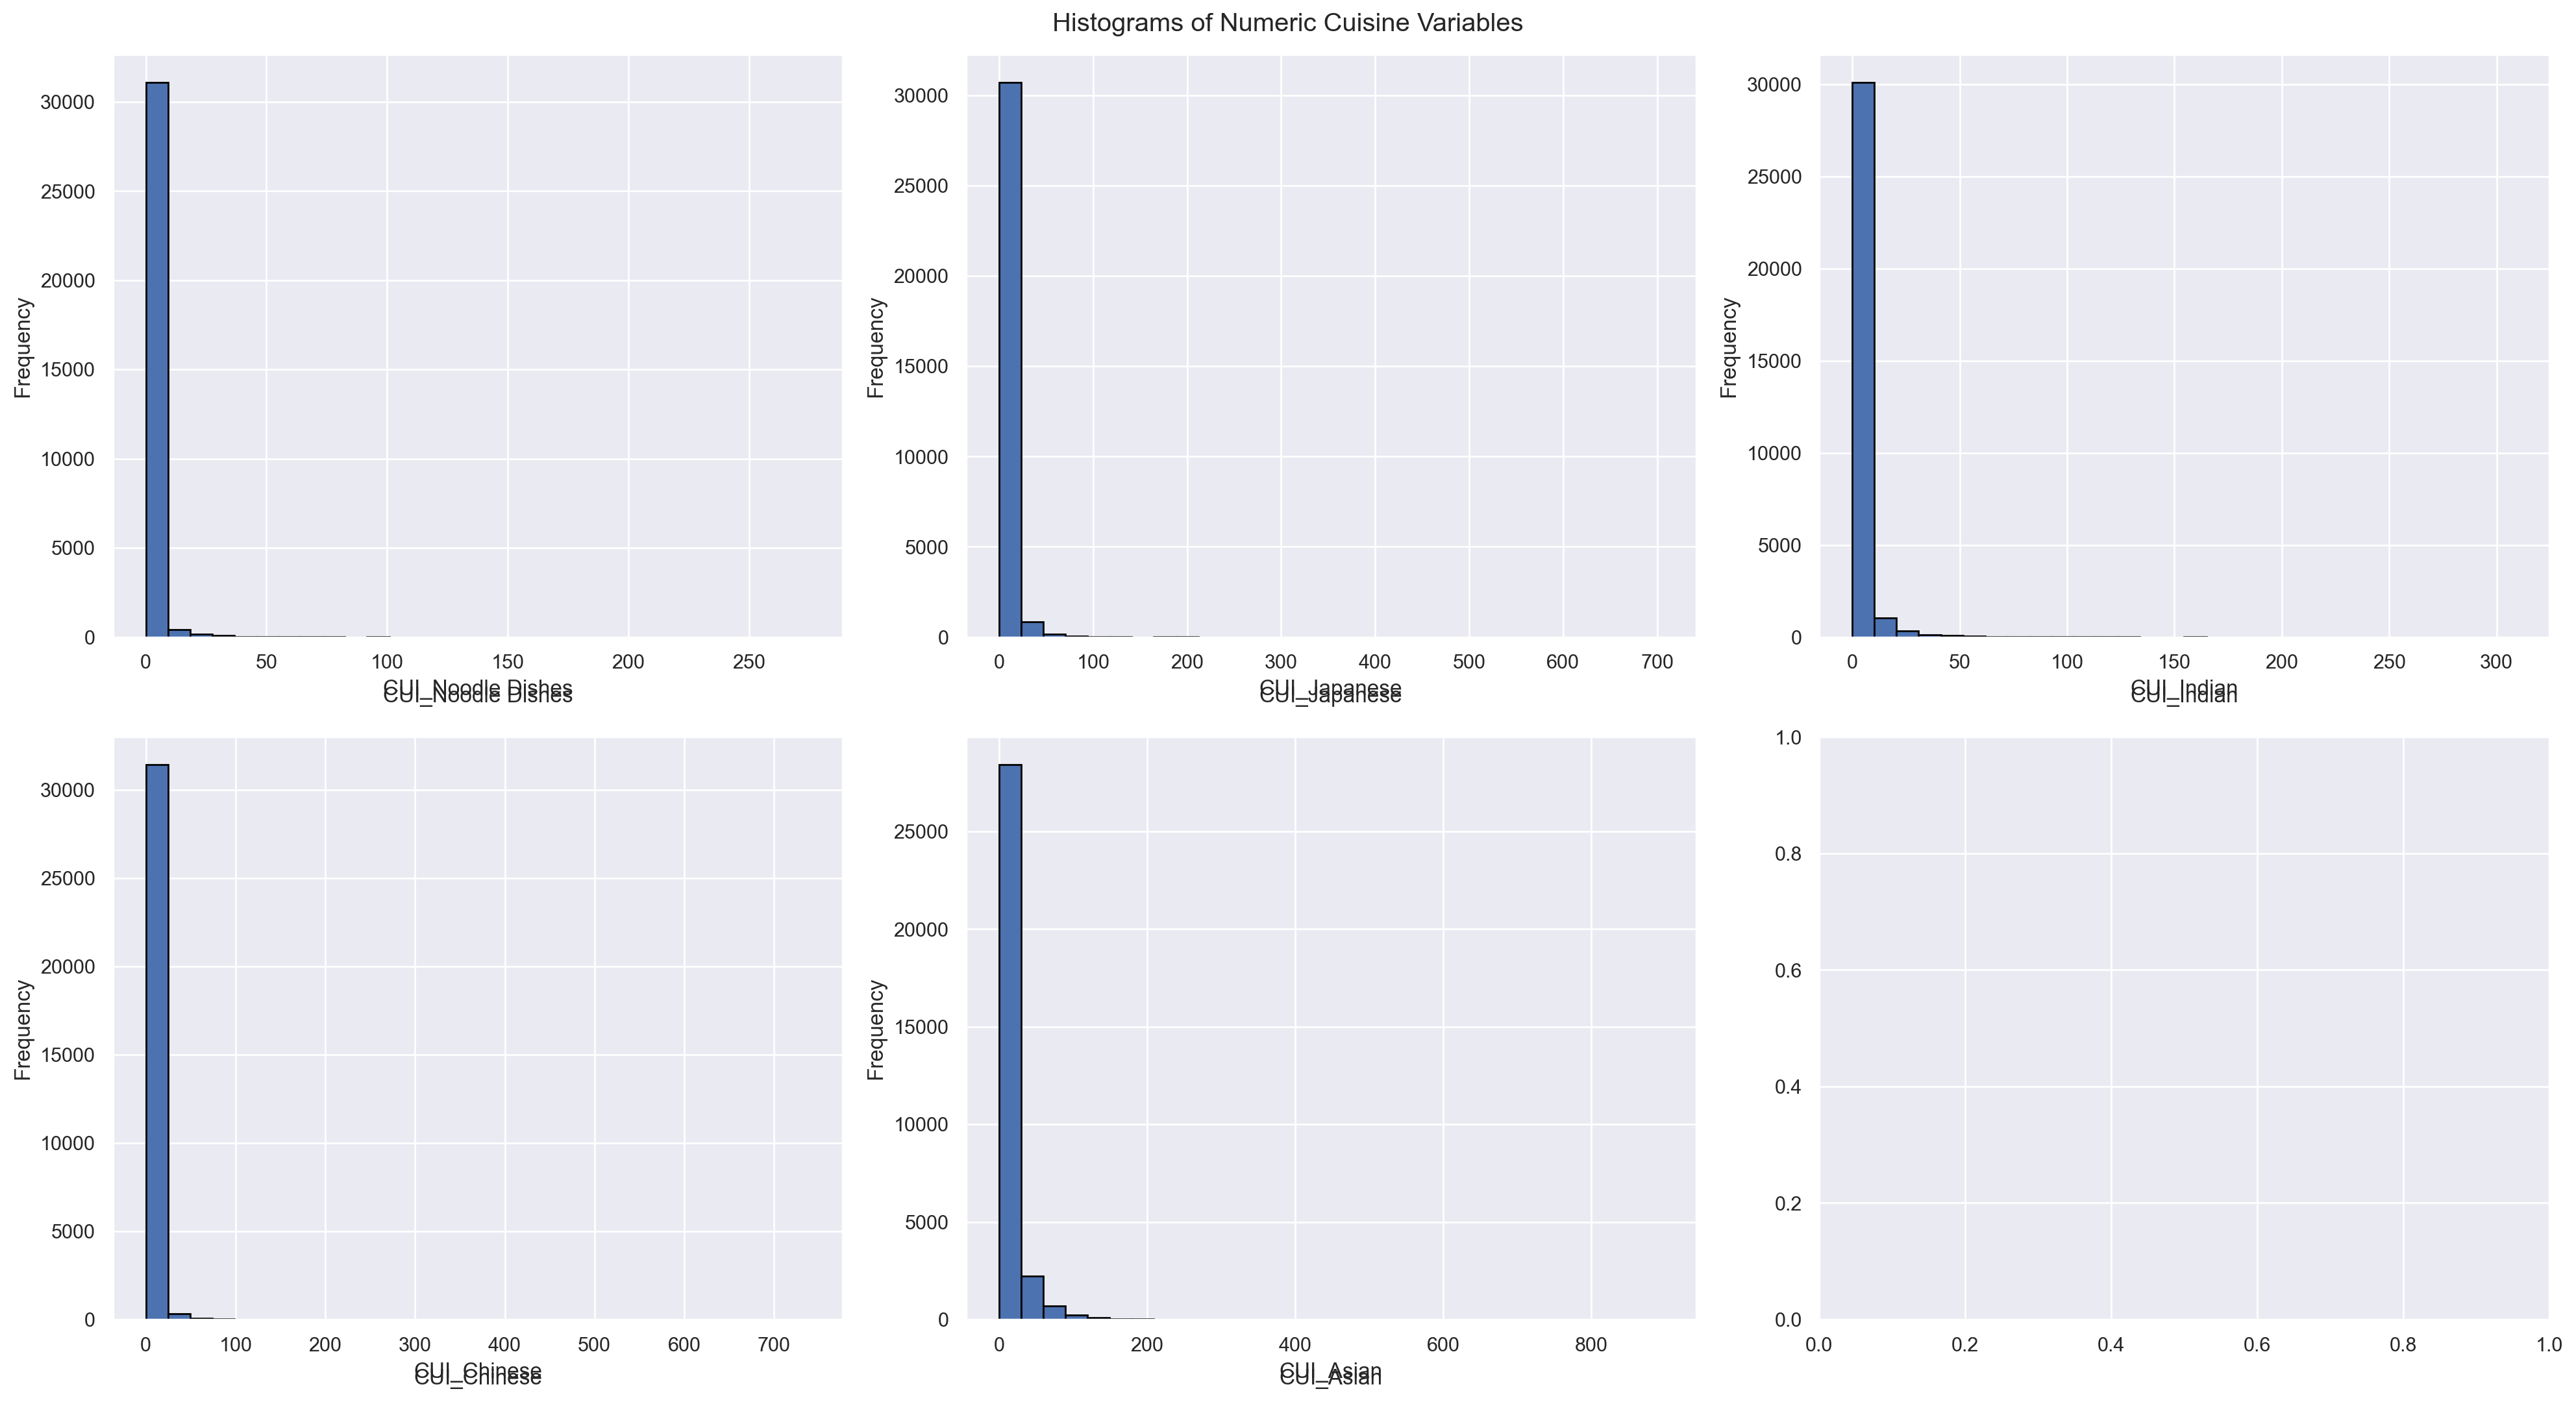

In [17]:
metric_features_CUI = ["CUI_Noodle Dishes", "CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Asian"]

# Set up the number of rows and columns for subplots
sp_rows = 2  # You can adjust this based on how many features you have
sp_cols = 3  # Adjust to match the number of features

# Prepare the figure and create a grid of subplots
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Iterate through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features_CUI):
    # Clean the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plot the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data, bins=30, edgecolor='black')  # Plot the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Set the title for the subplot, slightly below the axis
        ax.set_xlabel(feat)  # Set x-axis label
        ax.set_ylabel('Frequency')  # Set y-axis label
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicate no data available
        ax.axis('off')  # Turn off the axis if there's no data

# Add a centered title for the entire figure
plt.suptitle("Histograms of Numeric Cuisine Variables")

# Check if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure as a PNG file with 200 DPI resolution
plt.savefig(os.path.join(output_dir, 'numeric_variables_histograms.png'), dpi=200)

# Display the figure
plt.show()

CUI_Asian is the sum of CUI_Noodle Dishes, CUI_Japanese, CUI_Indian, CUI_Chines and they have exactly the same distribution. We're dropping this last 4 features, since we're not losing any information

In [7]:
#df.drop(columns=["CUI_Noodle Dishes", "CUI_Japanese", "CUI_Indian", "CUI_Chinese"], inplace=True)
#let's not drop anything yet

* Nonsense values

We have people on our data base who haven't ordered anything yet. We need to exclude them

In [9]:
df["product_count"].value_counts().sort_index(ascending=True)

0       156
1      4687
2      6270
3      4960
4      3397
       ... 
97        1
109       1
110       1
117       1
269       1
Name: product_count, Length: 93, dtype: int64

In [10]:
df["vendor_count"].value_counts().sort_index(ascending=True)

0      138
1     9049
2     8531
3     5164
4     2979
5     1874
6     1165
7      816
8      593
9      394
10     285
11     217
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: vendor_count, dtype: int64

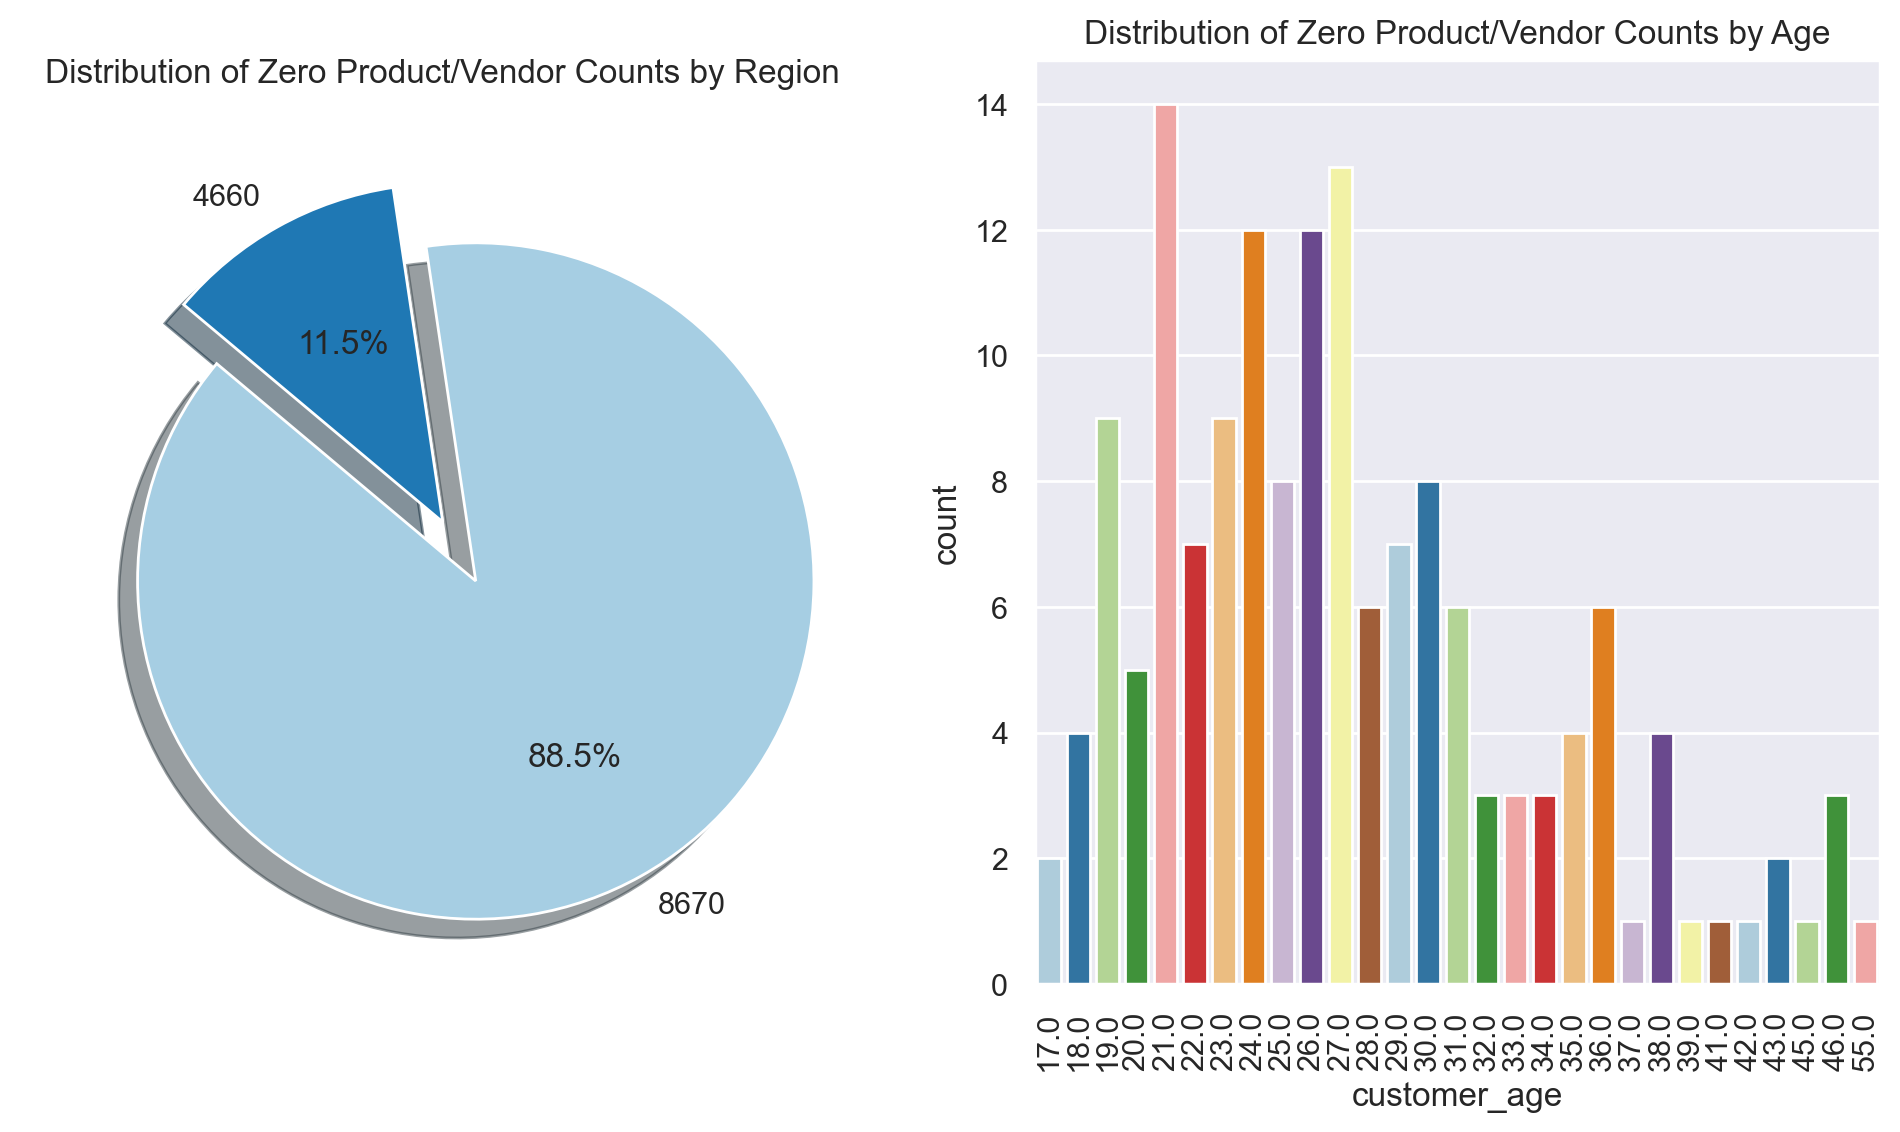

In [36]:
df_zero_prod_or_vend = df[(df['product_count'] == 0) | (df['vendor_count'] == 0)]
region_counts = df_zero_prod_or_vend['customer_region'].value_counts()
age_counts = df_zero_prod_or_vend['customer_age'].value_counts()

# Plot 2 piecharts, 1 grouped by age and 1 by region
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# By region
axs[0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, 
           colors=plt.cm.Paired.colors, explode=(0.2, 0), shadow=True)
axs[0].set_title('Distribution of Zero Product/Vendor Counts by Region')

# By age
sns.countplot(data=df_zero_prod_or_vend, x='customer_age', ax=axs[1], palette='Paired')
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Zero Product/Vendor Counts by Age')

plt.show()

The 1st graph is (kind of) interesting, but the 2nd one isn't really

In [9]:
#df = df[~((df['product_count'] == 0) & (df['vendor_count'] == 0))]

Also, shouldn't is_chain be a boolean?

In [32]:
df.is_chain.unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

* New df

In [8]:
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670          26.0             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1         22.0           0    FREEBIE           DIGI   
f6b6709018          0         22.0           0   DELIVERY           DIGI   
f74ad8ce3f          1         22.0           0          -           DIGI   
f7b19c0241          0         22.0           0   DISCOUNT           DIGI   
fd40d3b0e0          0         22.0           0          -           CASH   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
1b8f824d5e           0.00  ...      0      0      0      0      2      0   
5d272b9dcb          12.82  ...      0      0      0      0      0      0   
f6d1b2ba63           9.20  ...      0      0      0      0      0      0   
180c632ed8           0.00  ...      1      0      0      0      0      0   
4eb37a6705          14.57  ...      0      0      0      0      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
f4e366c281           0.00  ...      0      0      0      0      0      0   
f6b6709018          18.04  ...      0      0      1      0      0      0   
f74ad8ce3f           0.00  ...      0      0      0      0      0      0   
f7b19c0241           0.00  ...      0      0      0      0      0      0   
fd40d3b0e0           0.00  ...      0      0      1      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
1b8f824d5e       0      0      0      0  
5d272b9dcb       0      0      0      0  
f6d1b2ba63       0      0      0      0  
180c632ed8       0      0      0      0  
4eb37a6705       0      0      0      0  
...            ...    ...    ...    ...  
f4e366c281       0      0      0      0  
f6b6709018       0      0      0      0  
f74ad8ce3f       0      0      0      0  
f7b19c0241       0      0      0      0  
fd40d3b0e0       0      0      0      0  

[31828 rows x 55 columns]

### New features

In [9]:
#(CATARINA) + (SARAH)

# 1. Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].sum(axis=1)
df['Weekend_days'] = df[['DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

# 2. Lunch HR (HR_11 to HR_13) and Dinner HR (HR_18 to HR_20)
df["Morning_HR"] = df[["HR_1", 'HR_2', 'HR_3', "HR_4", "HR_5", 'HR_6', 'HR_7', "HR_8", "HR_9", "HR_10"]].mean(axis=1)
df['Lunch_HR'] = df[['HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df["Afternoon"] = df[['HR_13', "HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1) #should we include 17 at dinner time?
df['Dinner_HR'] = df[['HR_18', 'HR_19', 'HR_20']].mean(axis=1)
df['Night_HR'] = df[["HR_21", 'HR_22', 'HR_23', "HR_0"]].mean(axis=1)

# 3. Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_Spend'] = df[cuisine_columns].sum(axis=1)

# 4. Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = df['Total_Spend'] / df['vendor_count']

# 5. Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = df['Total_Spend'] / df['product_count']

# 6. Cuisine Diversity = Number of non-zero CUI_* columns
df['Cuisine_Diversity'] = df[cuisine_columns].gt(0).sum(axis=1)

df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670          26.0             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1         22.0           0    FREEBIE           DIGI   
f6b6709018          0         22.0           0   DELIVERY           DIGI   
f74ad8ce3f          1         22.0           0          -           DIGI   
f7b19c0241          0         22.0           0   DISCOUNT           DIGI   
fd40d3b0e0          0         22.0           0          -           CASH   

             CUI_American  ...  Weekend_days  Morning_HR  Lunch_HR  Afternoon  \
customer_id                ...                                                  
1b8f824d5e           0.00  ...             1         0.0  0.000000        0.0   
5d272b9dcb          12.82  ...             1         0.1  0.333333        0.0   
f6d1b2ba63           9.20  ...             1         0.1  0.333333        0.0   
180c632ed8           0.00  ...             1         0.0  0.333333        0.2   
4eb37a6705          14.57  ...             1         0.2  0.000000        0.0   
...                   ...  ...           ...         ...       ...        ...   
f4e366c281           0.00  ...             1         0.0  0.333333        0.2   
f6b6709018          18.04  ...             1         0.0  0.000000        0.2   
f74ad8ce3f           0.00  ...             1         0.1  0.000000        0.0   
f7b19c0241           0.00  ...             1         0.0  0.333333        0.0   
fd40d3b0e0           0.00  ...             1         0.0  0.000000        0.2   

             Dinner_HR  Night_HR  Total_Spend  Avg_Spend_per_Vendor  \
customer_id                                                           
1b8f824d5e    0.666667       0.0        28.88                14.440   
5d272b9dcb    0.000000       0.0        19.21                 9.605   
f6d1b2ba63    0.000000       0.0         9.20                 9.200   
180c632ed8    0.000000       0.0        31.56                15.780   
4eb37a6705    0.000000       0.0        55.44                27.720   
...                ...       ...          ...                   ...   
f4e366c281    0.000000       0.0        18.04                18.040   
f6b6709018    0.000000       0.0        18.04                18.040   
f74ad8ce3f    0.000000       0.0        17.79                17.790   
f7b19c0241    0.000000       0.0        12.03                12.030   
fd40d3b0e0    0.000000       0.0         7.91                 7.910   

             Spend_per_Product  Cuisine_Diversity  
customer_id                   

In [10]:
#(SARAH)

#Peak HR
HR_all = df.loc[:, 'HR_0':'HR_23']
#all columns
HR_sum = HR_all.sum()
#peak number
HR_peak_sum = HR_sum.max()
#peak HR 
HR_peak = HR_sum.idxmax()
print("Peak HR is:", HR_peak)
print("With a peak orders of:", HR_peak_sum)

#Customer Duration
df["Customer_Duration"] = df['first_order'] - df['last_order']

#Frequency
df["Frequency"] = df["Customer_Duration"] / df["product_count"]
df

Peak HR is: HR_17
With a peak orders of: 12448.0


customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670          26.0             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1         22.0           0    FREEBIE           DIGI   
f6b6709018          0         22.0           0   DELIVERY           DIGI   
f74ad8ce3f          1         22.0           0          -           DIGI   
f7b19c0241          0         22.0           0   DISCOUNT           DIGI   
fd40d3b0e0          0         22.0           0          -           CASH   

             CUI_American  ...  Lunch_HR  Afternoon  Dinner_HR  Night_HR  \
customer_id                ...                                             
1b8f824d5e           0.00  ...  0.000000        0.0   0.666667       0.0   
5d272b9dcb          12.82  ...  0.333333        0.0   0.000000       0.0   
f6d1b2ba63           9.20  ...  0.333333        0.0   0.000000       0.0   
180c632ed8           0.00  ...  0.333333        0.2   0.000000       0.0   
4eb37a6705          14.57  ...  0.000000        0.0   0.000000       0.0   
...                   ...  ...       ...        ...        ...       ...   
f4e366c281           0.00  ...  0.333333        0.2   0.000000       0.0   
f6b6709018          18.04  ...  0.000000        0.2   0.000000       0.0   
f74ad8ce3f           0.00  ...  0.000000        0.0   0.000000       0.0   
f7b19c0241           0.00  ...  0.333333        0.0   0.000000       0.0   
fd40d3b0e0           0.00  ...  0.000000        0.2   0.000000       0.0   

             Total_Spend  Avg_Spend_per_Vendor  Spend_per_Product  \
customer_id                                                         
1b8f824d5e         28.88                14.440              5.776   
5d272b9dcb         19.21                 9.605              9.605   
f6d1b2ba63          9.20                 9.200              4.600   
180c632ed8         31.56                15.780             10.520   
4eb37a6705         55.44                27.720             11.088   
...                  ...                   ...                ...   
f4e366c281         18.04                18.040             18.040   
f6b6709018         18.04                18.040             18.040   
f74ad8ce3f         17.79                17.790             17.790   
f7b19c0241         12.03                12.030             12.030   
fd40d3b0e0          7.91                 7.910              7.910   

             Cuisine_Diversity  Customer_Duration  Frequency  
customer_id                                                   
1b8f824d5e                   1               -1

In [20]:
# (Afonso)

#Favourite Cuisine
df['Fav_Cuisine'] = df[cuisine_columns].idxmax(axis=1)

#Favourite Cuisine Concentration
df['Fav_Cuisine_Concentration'] = df[cuisine_columns].max(axis=1) / df['Total_Spend']

dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
hr_columns = [f'HR_{i}' for i in range(24)]

# Total Orders
df['Total_Orders_HR'] = df[hr_columns].sum(axis=1).astype(int)
df['Total_Orders_DOW'] = df[dow_columns].sum(axis=1).astype(int)

df[df['Total_Orders_HR'] != df['Total_Orders_DOW']] 
#Note: Interestingly the Total orders by DOW is always higher when they differ

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
ae38da6386             8670          21.0             2              3   
a21a839c77             4140          19.0             1              4   
9237d23413             8670          22.0             3              4   
8c6ffd7357             4660          25.0             3              4   
67c6c9f9c4             4660          24.0             1              3   
...                     ...           ...           ...            ...   
37b72b449d             2360          23.0             1              4   
ac382ddfd1                -          28.0             1              2   
96f1fc25e3             8670          25.0             2              2   
d7c7face7e             2440          26.0             1              1   
6624e03cdd             8670          28.0             1              2   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
ae38da6386          1          0.0           7   DELIVERY           DIGI   
a21a839c77          4          0.0          21          -           CARD   
9237d23413          2          0.0          27          -           CARD   
8c6ffd7357          1          0.0          28          -           CARD   
67c6c9f9c4          0          0.0          36    FREEBIE           DIGI   
...               ...          ...         ...        ...            ...   
37b72b449d          0         85.0          85   DELIVERY           DIGI   
ac382ddfd1          2         87.0          89   DELIVERY           CARD   
96f1fc25e3          1         88.0          88   DELIVERY           CASH   
d7c7face7e          1         90.0          90   DELIVERY           CASH   
6624e03cdd          0         22.0           0   DELIVERY           CARD   

             CUI_American  ...  Spend_per_Product  Cuisine_Diversity  \
customer_id                ...                                         
ae38da6386           0.00  ...          11.926667                  2   
a21a839c77           0.00  ...           5.522500                  1   
9237d23413           5.77  ...           7.357500                  3   
8c6ffd7357          27.54  ...           8.410000                  2   
67c6c9f9c4           0.00  ...           2.046667                  1   
...                   ...  ...                ...                ...   
37b72b449d           0.00  ...           6.020000                  1   
ac382ddfd1           0.00  ...           8.935000                  1   
96f1fc25e3           0.00  ...           8.990000                  1   
d7c7face7e           2.61  ...           2.610000                  1   
6624e03cdd          23.83  ...          11.915000                  1   

             Customer_Duration  Frequency               Fav_Cuisine  \
customer_id                                                           
ae38da6386                -7.0  -2.333333                 CUI_Asian   
a21a839c77               -21.0  -5.250000  CUI_Street Food / Snacks   
9237d23413               -27.0  -6.750000                 CUI_Asian   
8c6ffd7357               -28.0  -7.000000              CUI_American   
67c6c9f9c4               -36.0 -12.000000               CUI_Italian   
...                        ...        ...                       ...   
37b72b449d                 0.0   0.000000                 CUI_Asian   
ac382ddfd1                -2.0  -1.000000                 CUI_Asian   
96f1fc25e3                 0.0   0.000000                 CUI_Asian   
d7c7face7e                 0.0   0.000000              CUI_American   
6624e03cdd                22.0  11.000000              CUI_American   

             Fav_Cuisine_Concentration  Total_Orders_HR  Total_Orders_DOW  \
customer_id                                                                 
ae38da6386                    0.662381       

In [21]:
#(Afonso)

# considering Total Orders by DOW

# Chain preference
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders_DOW']

# Average money spent per order
df['Avg_Spend_per_Order'] = df['Total_Spend'] / df['Total_Orders_DOW']

# TODO: Most spent Cuisine Continent

# Visual Exploration

In [22]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Week_days',
       'Weekend_days', 'Morning_HR', 'Lunch_HR', 'Afternoon', 'Dinner_HR',
       'Night_HR', 'Total_Spend', 'Avg_Spend_per_Vendor', 'Spend_per_Product',
       'Cuisine_Diversity', 'Customer_Duration', 'Frequency', 'Fav_Cuisine',
       'Fav_Cuisine_Concentrati

In [23]:
non_metric_features = ["customer_region", "last_promo", "payment_method", "Fav_Cuisine"] #nominal
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

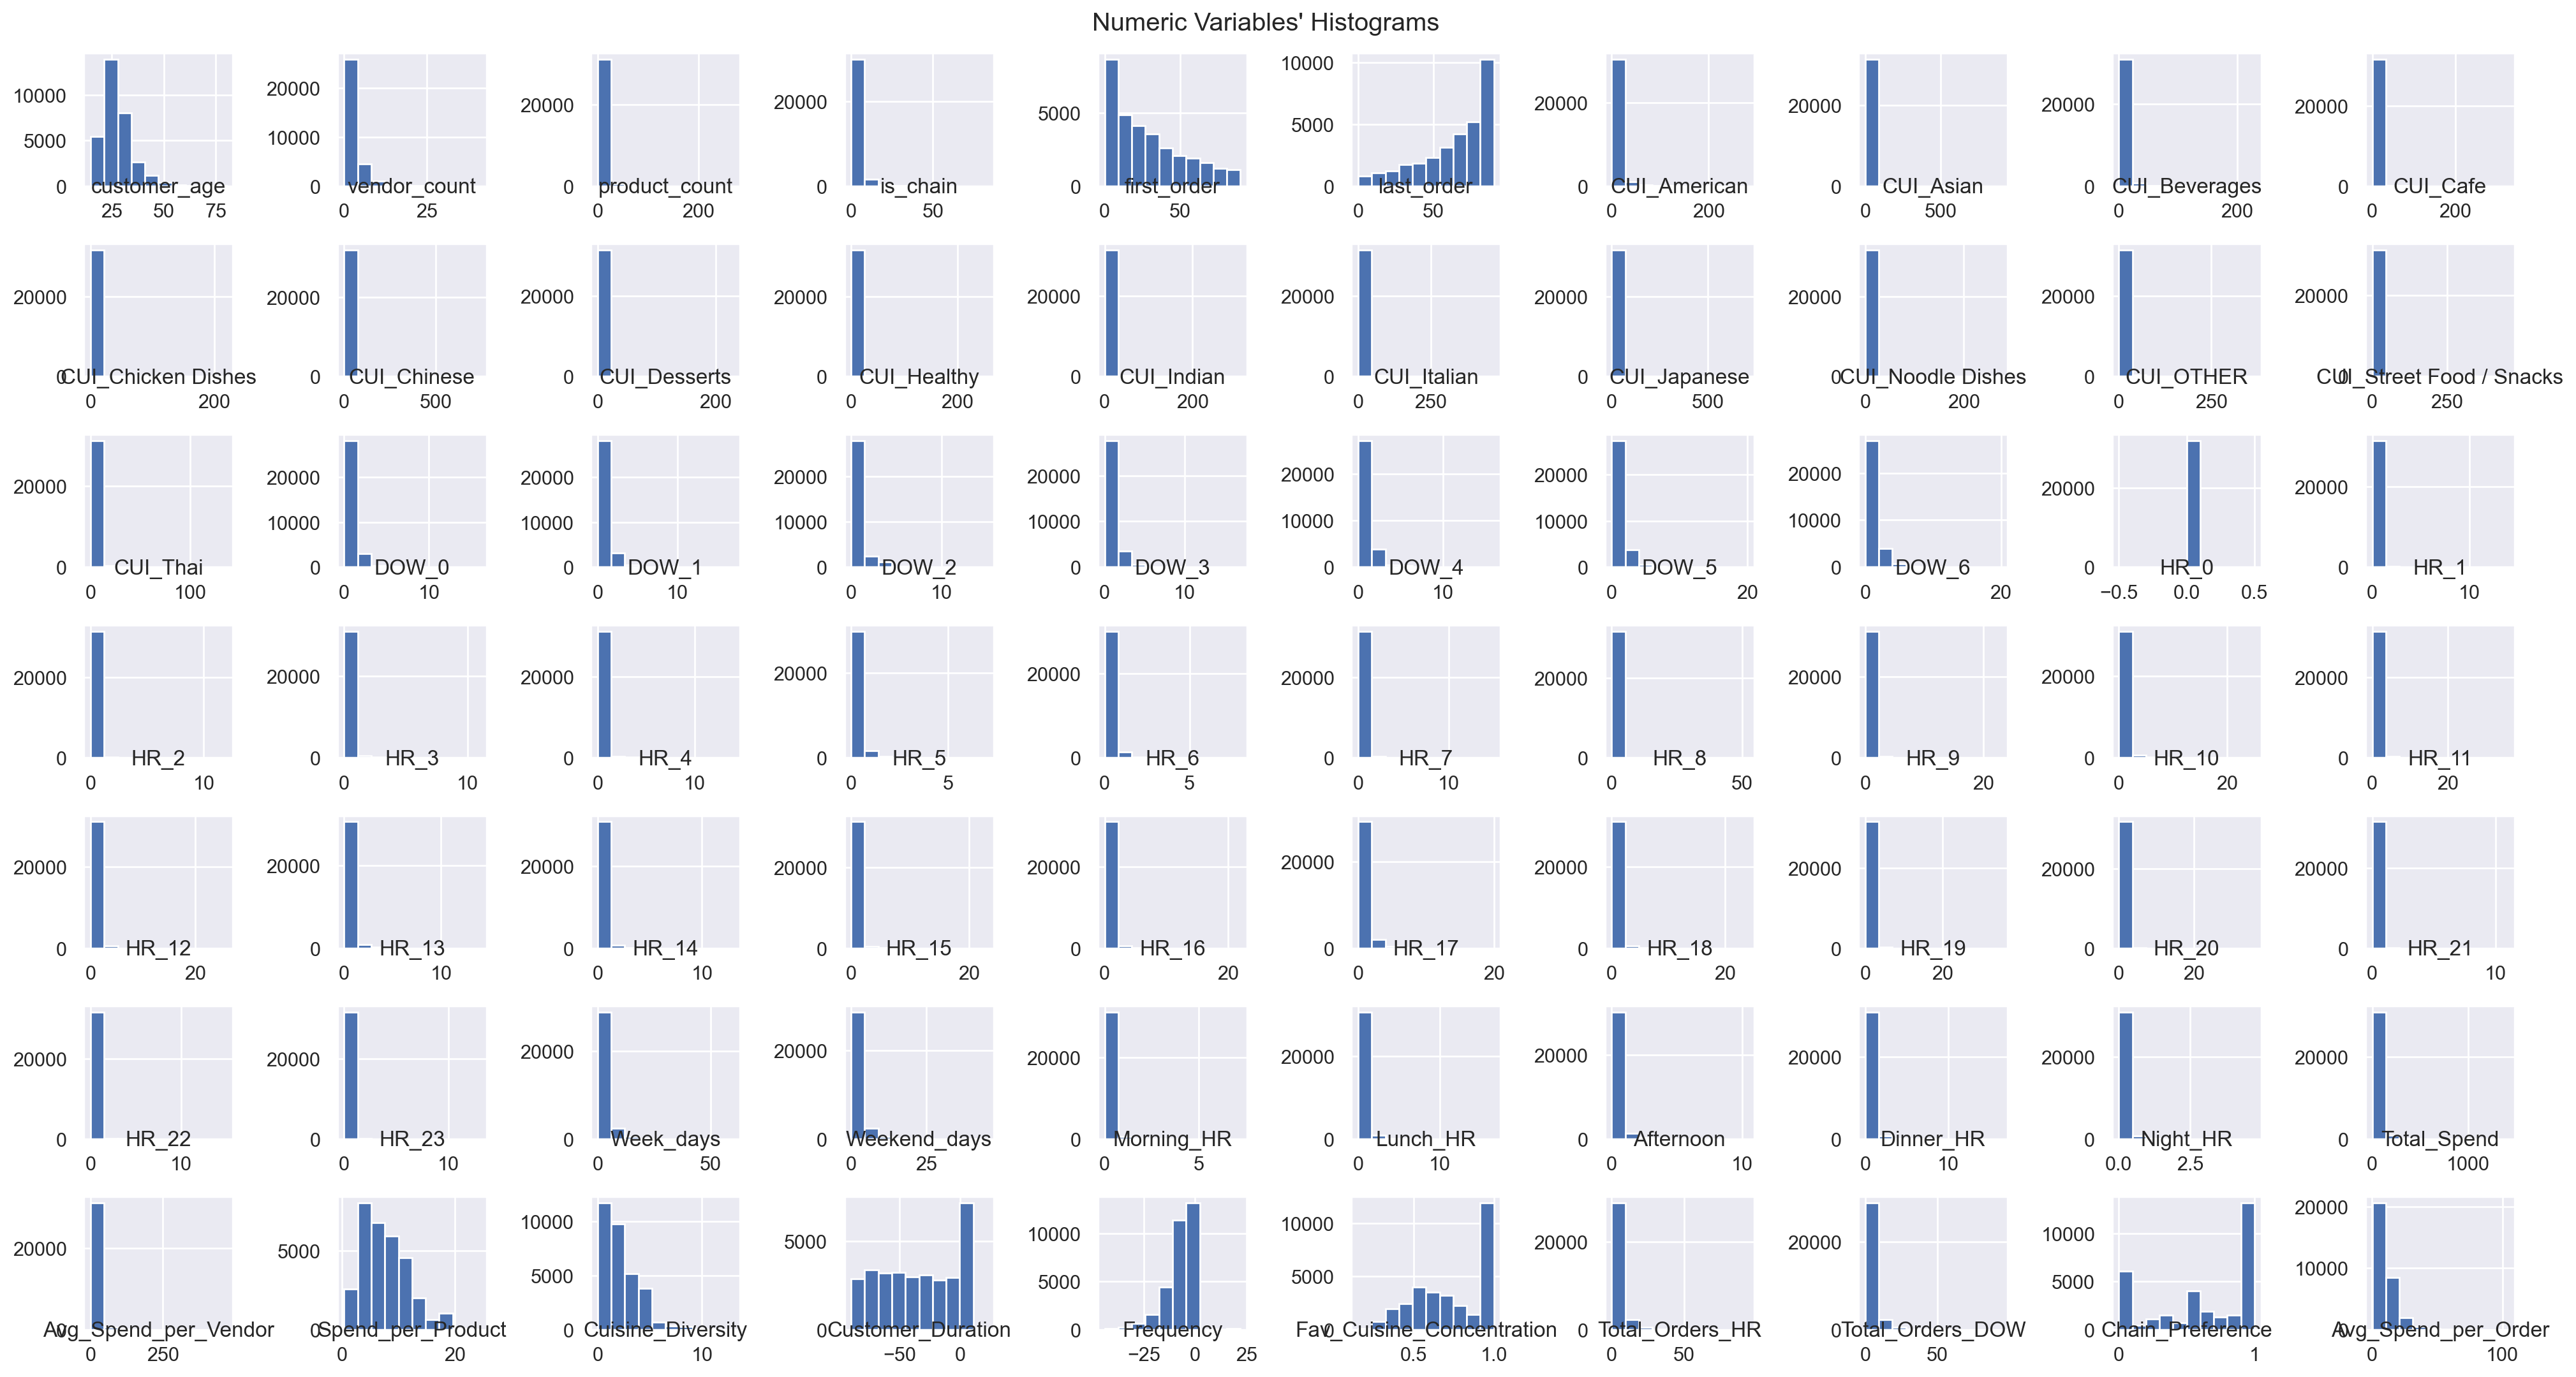

In [27]:
# Prepare the figure and create a grid of subplots
fig, axes = plt.subplots(7, 10, figsize=(20, 11), tight_layout=True)

# Iterate through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Clean the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plot the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plot the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Set the title for the subplot, slightly below the axis
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicate no data available
        ax.axis('off')  # Turn off the axis if there's no data

# Add a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Check if the output directory exists; if not, create it
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

# Save the figure as a PNG file with 200 DPI resolution
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Display the figure
plt.show()

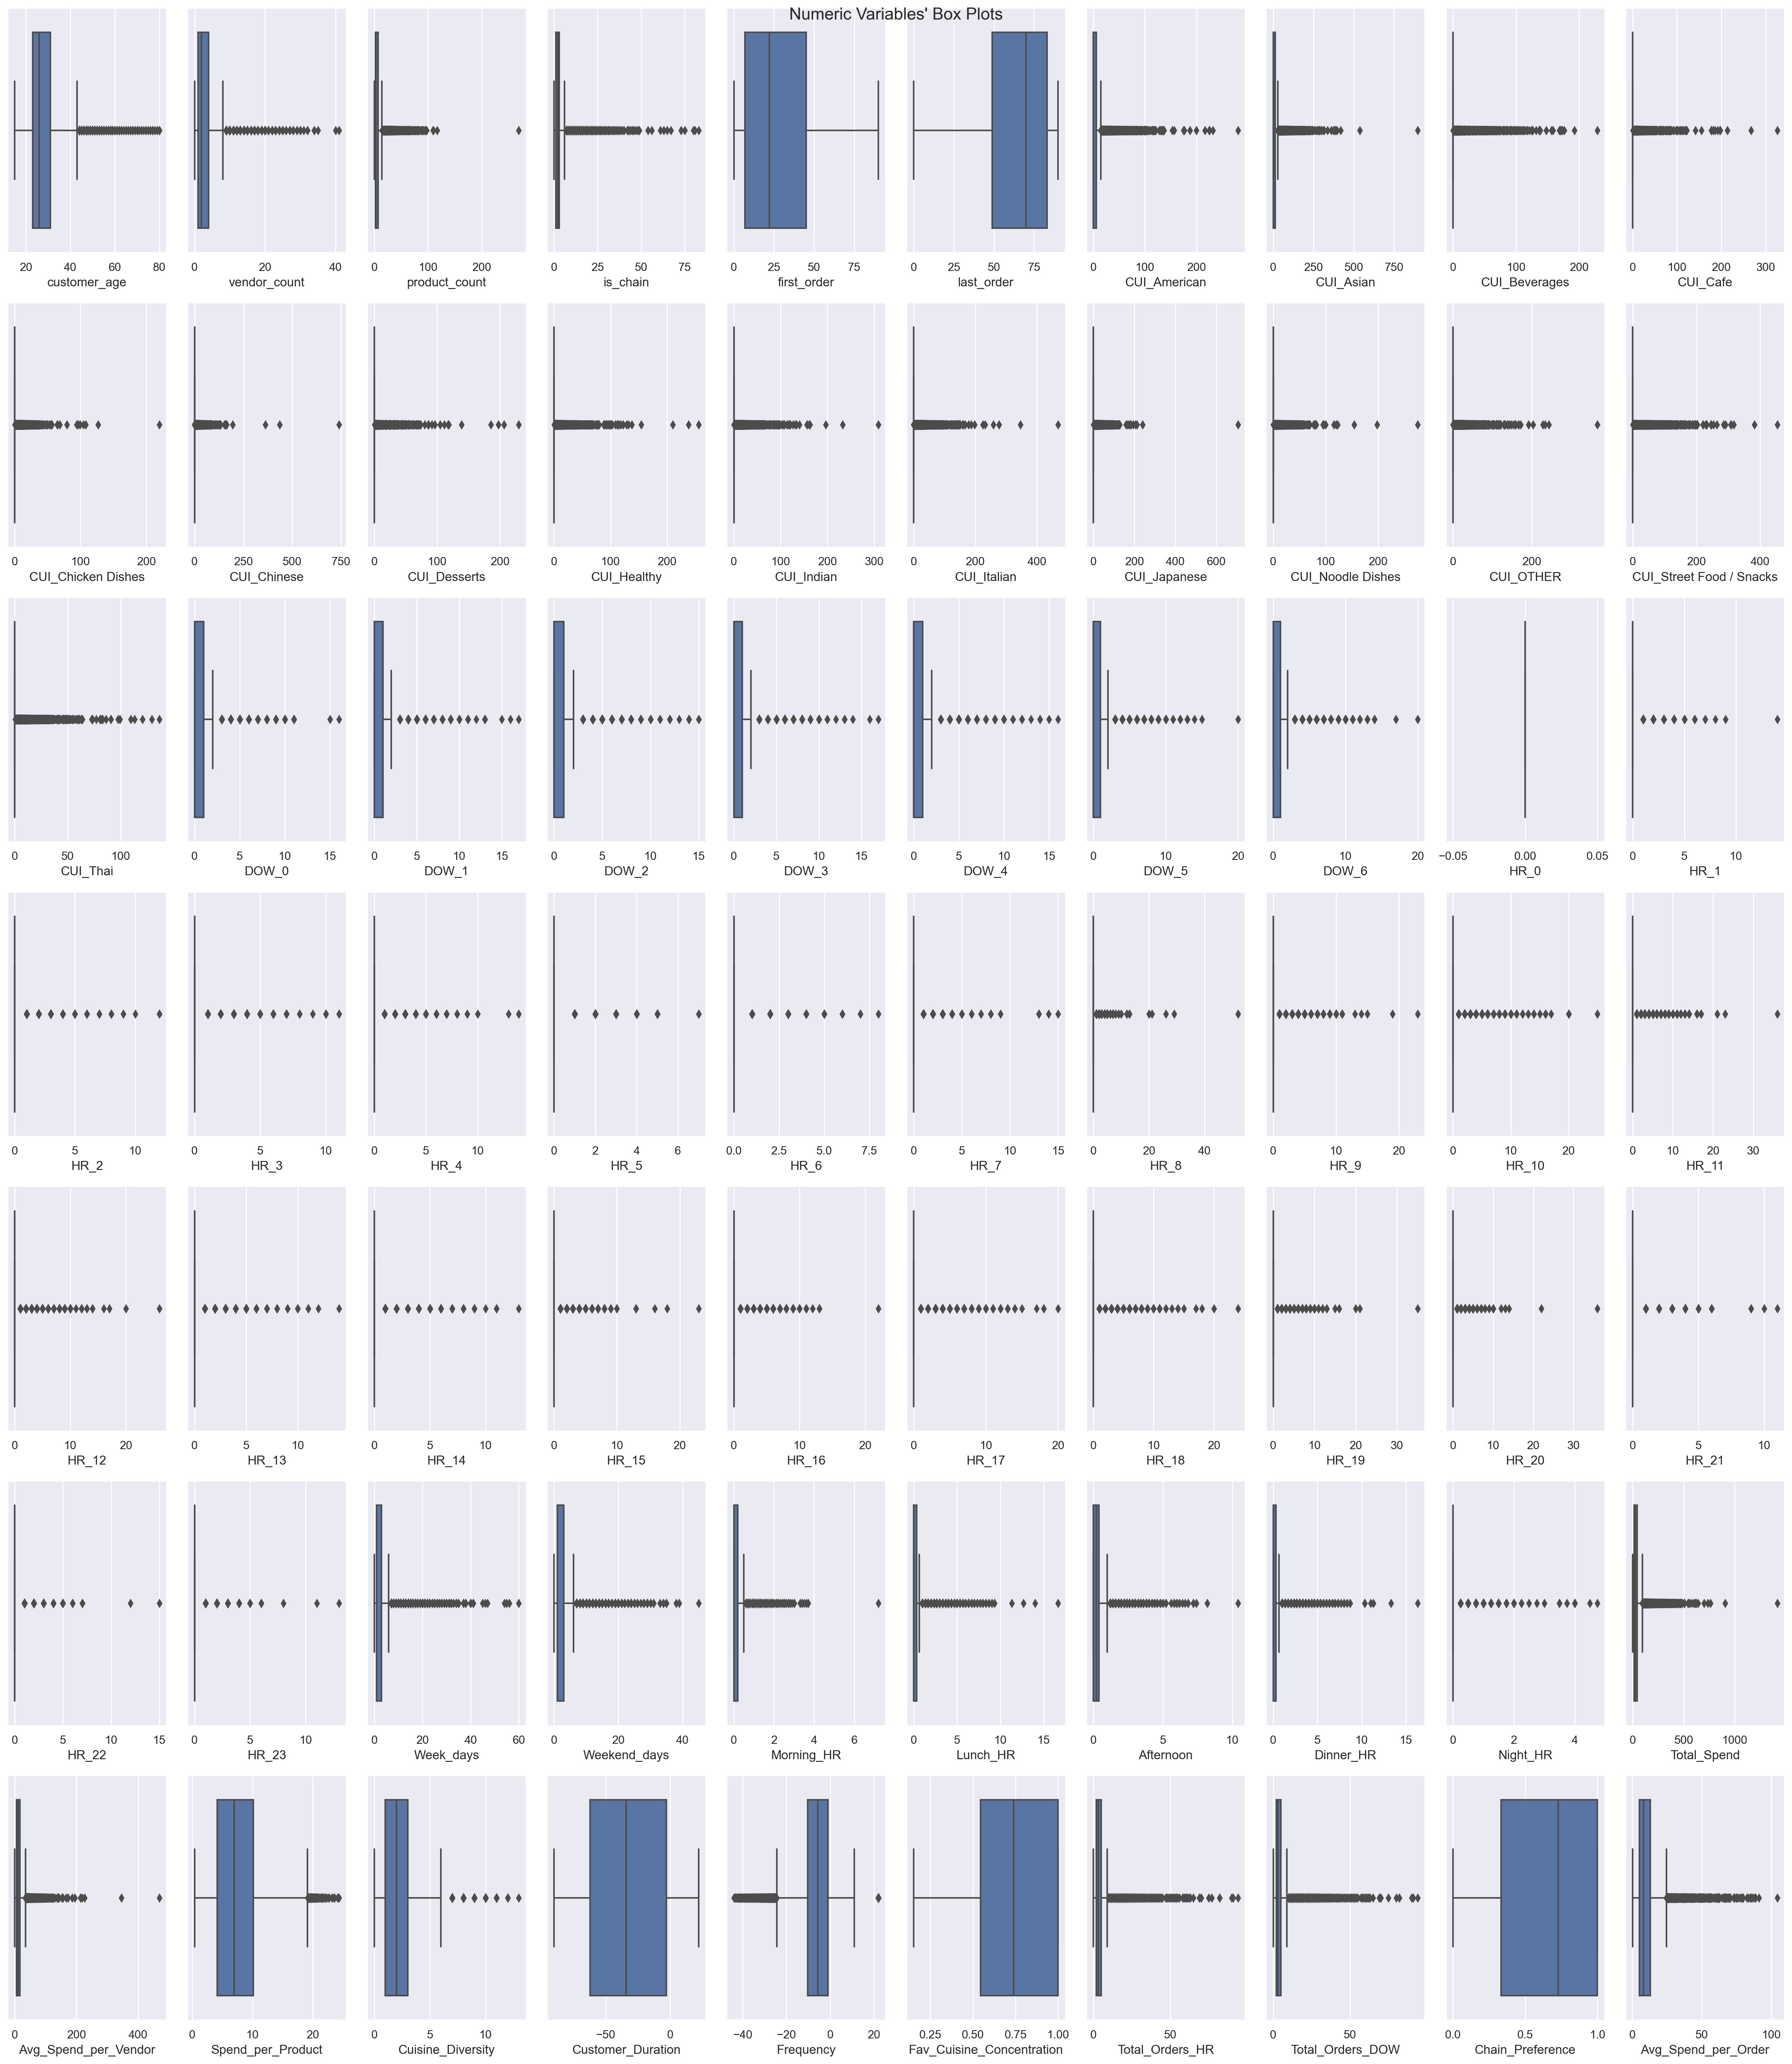

In [29]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(7, 
                         10, 
                         figsize=(24, 28), 
                         tight_layout=True
                        )

# Plot data: Iterate across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)

# Layout: Add a centered title to the figure
title = "Numeric Variables' Box Plots"
plt.suptitle(title, fontsize=16)

# Create directory if it doesn't exist
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

# Save the figure with a higher dpi for clarity
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

# Show the plot
plt.show()

# Bivariate Analysis

## Pairwise Relationship of Numerical Variables

### Scatter Plots

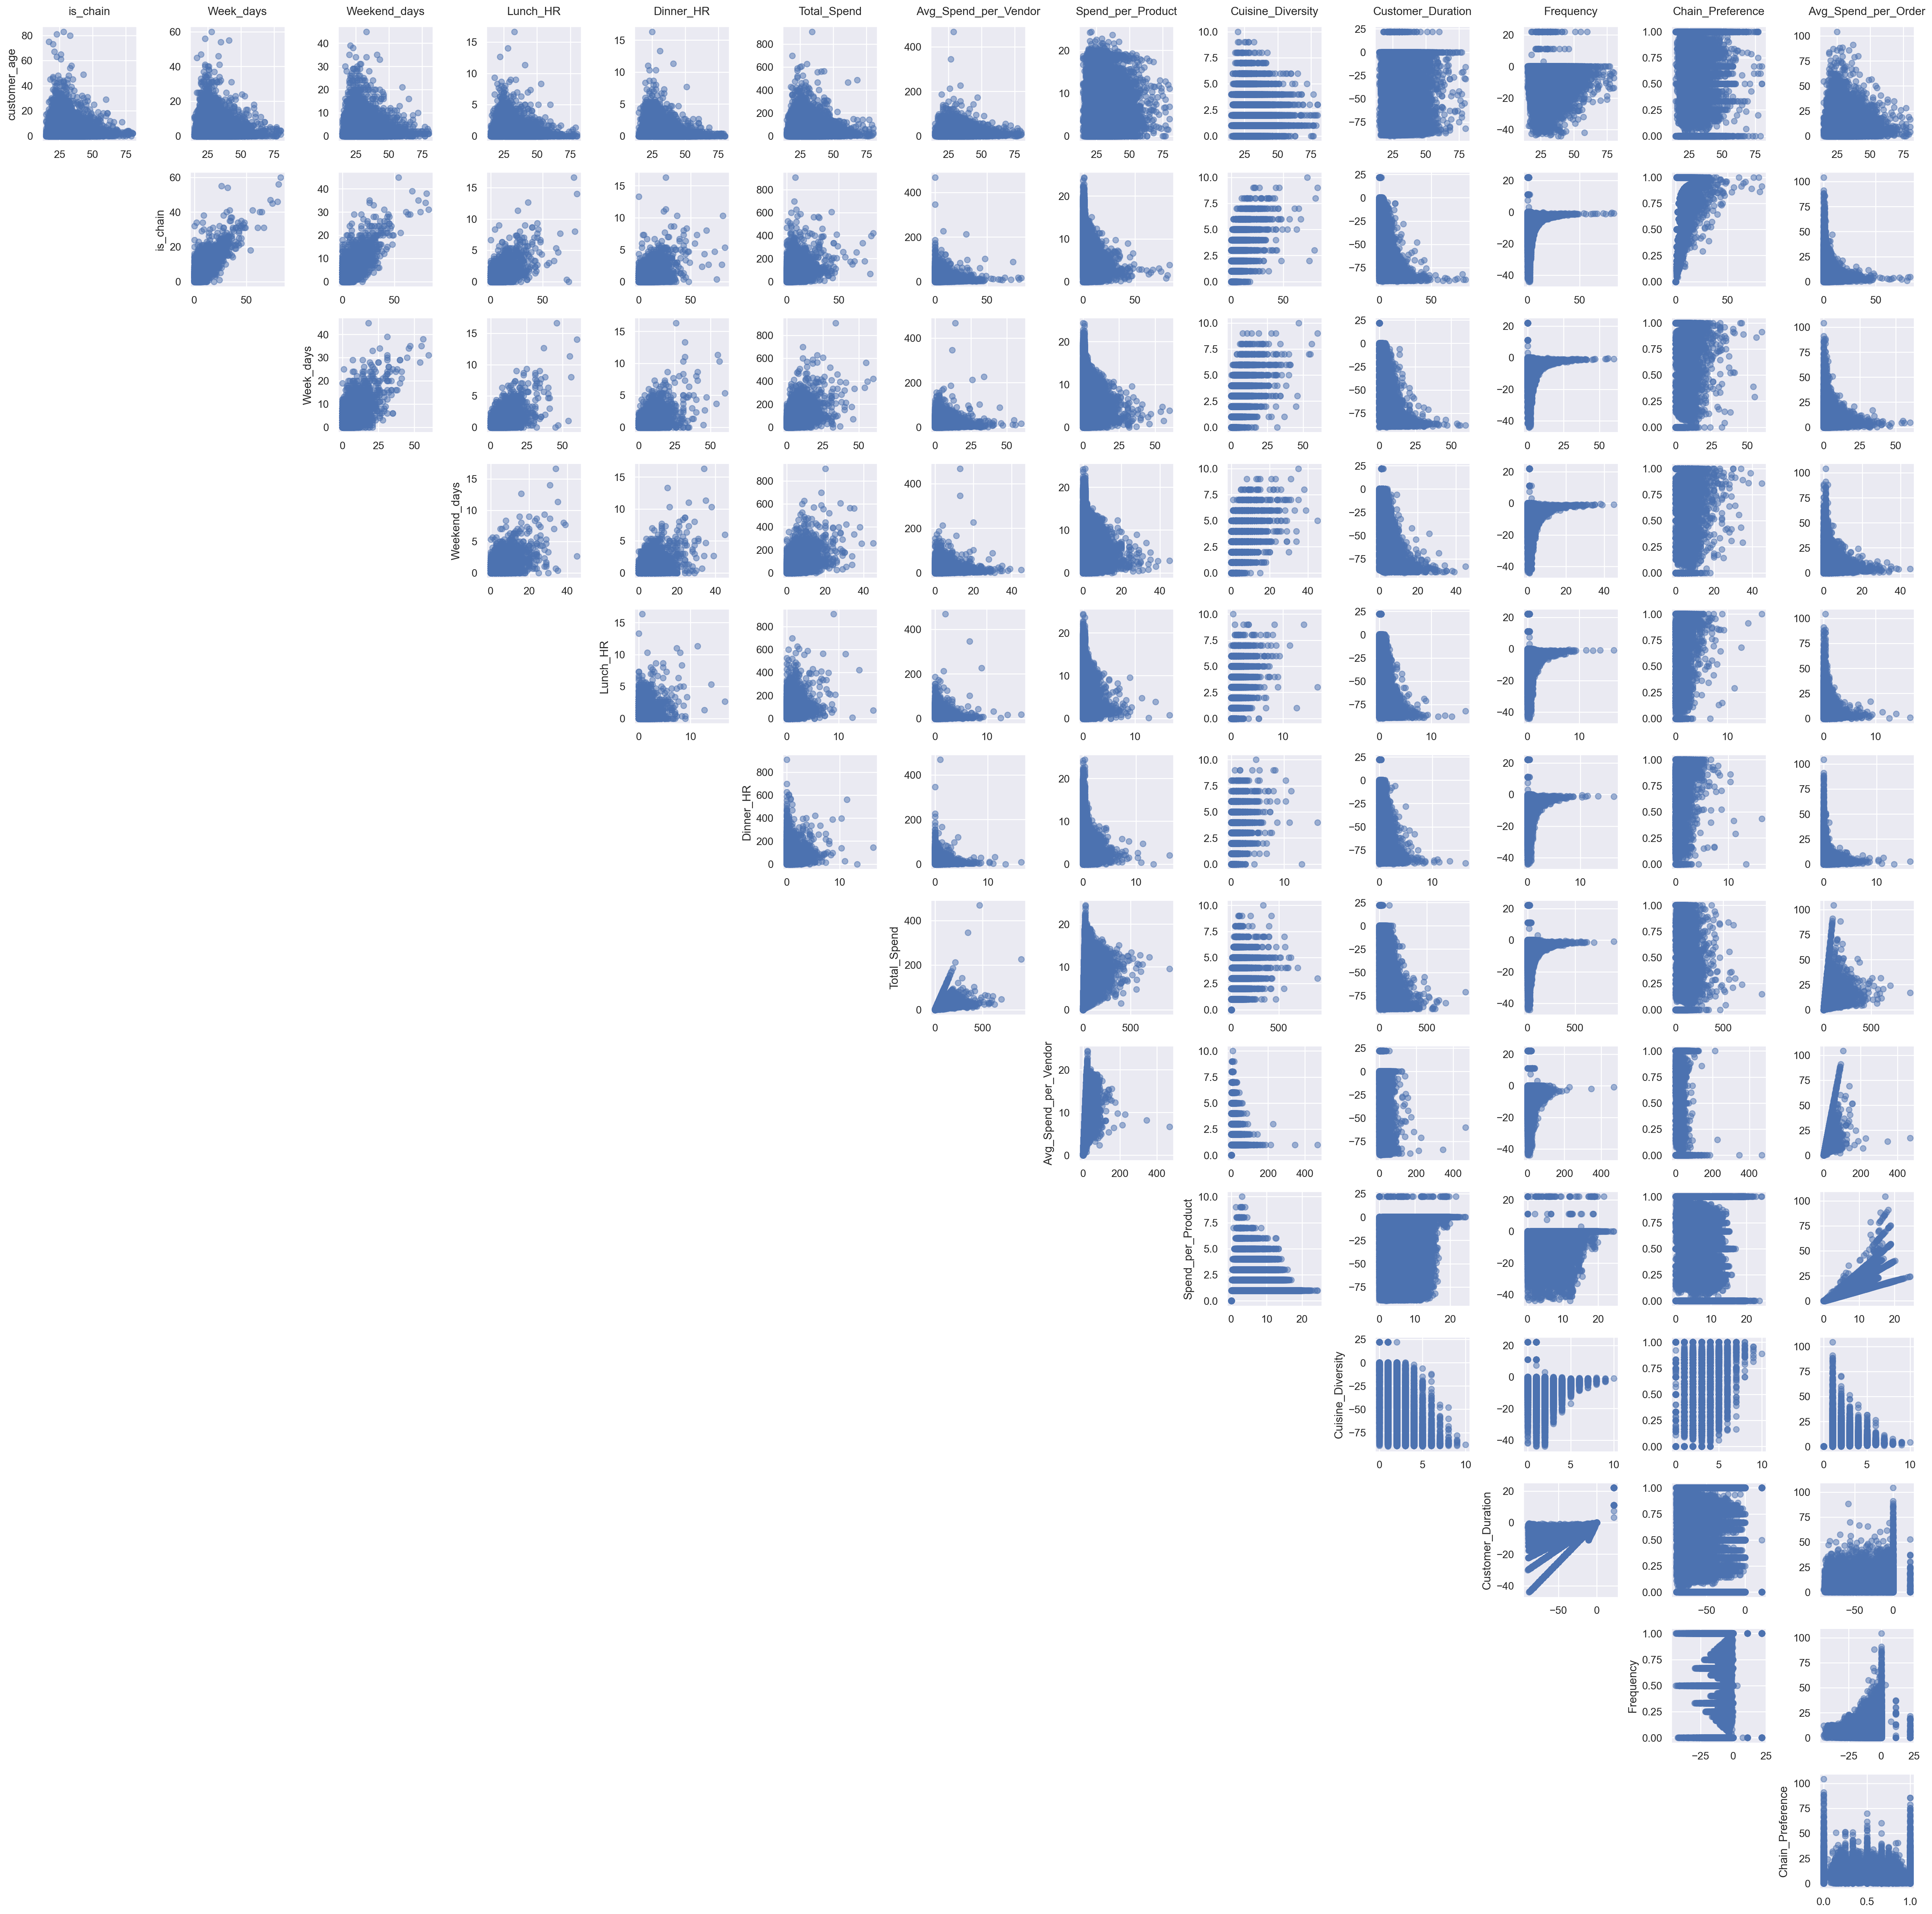

In [75]:
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Frequency','Chain_Preference', 'Avg_Spend_per_Order']

# Figure size
plt.figure(figsize=(30, 30)) 
n = len(variables)

for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n, n, i * n + j + 1)
        plt.scatter(df[variables[i]], df[variables[j]], alpha=0.5)
        
        # Labelling the margins
        if j == i + 1:  # Only the first graph in each line will have the title
            plt.ylabel(variables[i])
        if i == n - 1:  # Only the last graph in each line will have the title
            plt.xlabel(variables[j])
        
        # Title for each graph
        if i == 0:  # Only the first graph in each column
            plt.title(variables[j], y=1.05)  

plt.tight_layout()
plt.show() 

### Visualize Data Distribution

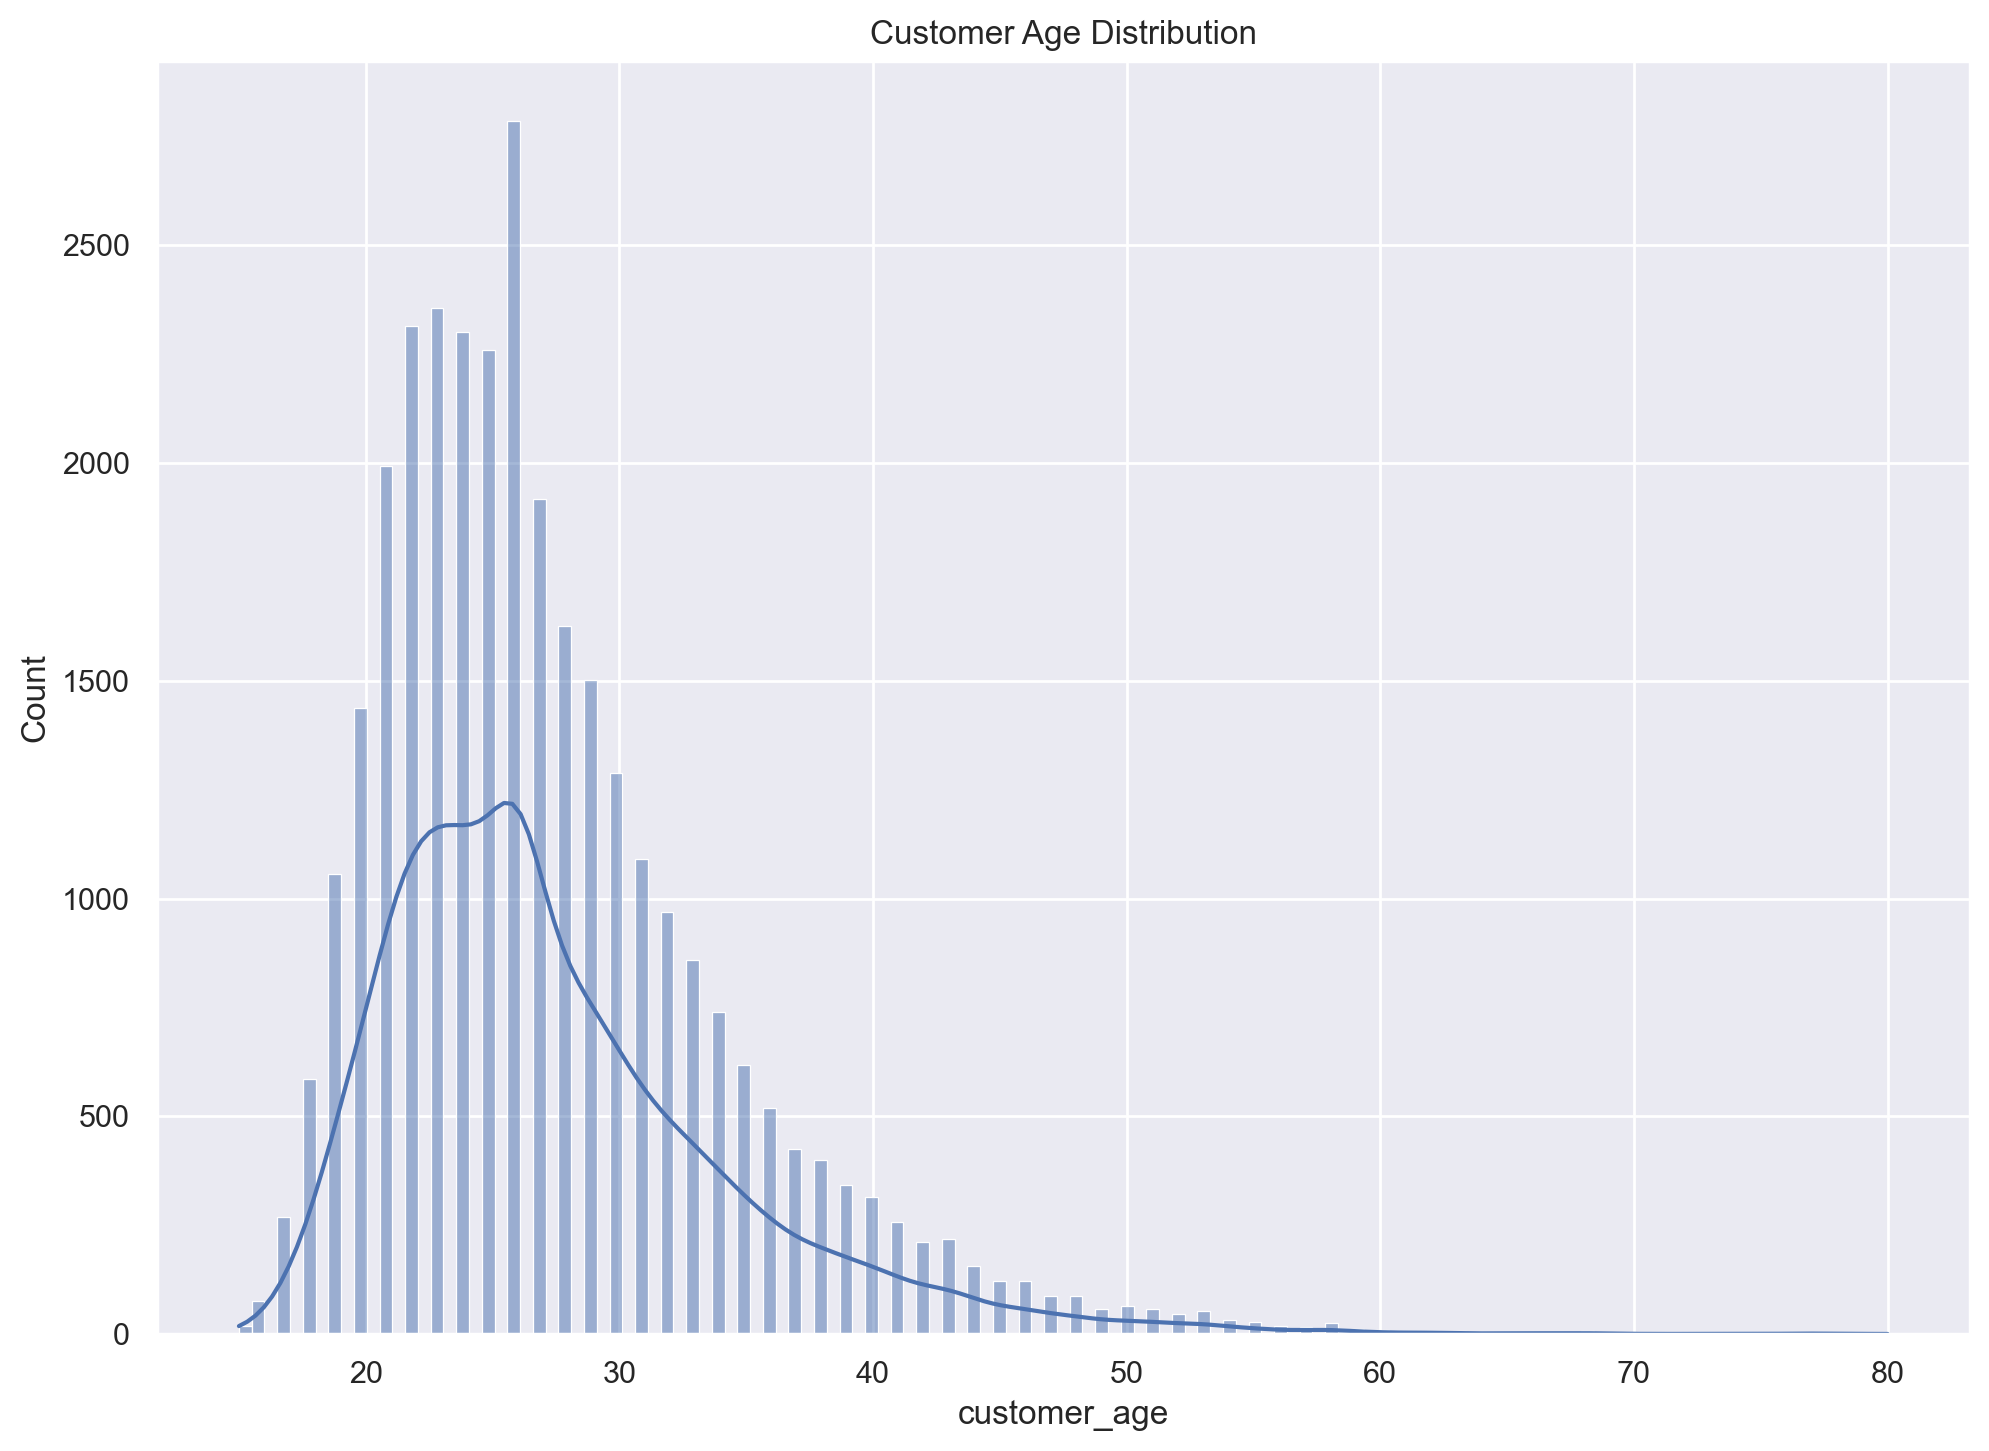

In [39]:
sns.histplot(df['customer_age'], kde=True)
plt.title('Customer Age Distribution')
plt.show()


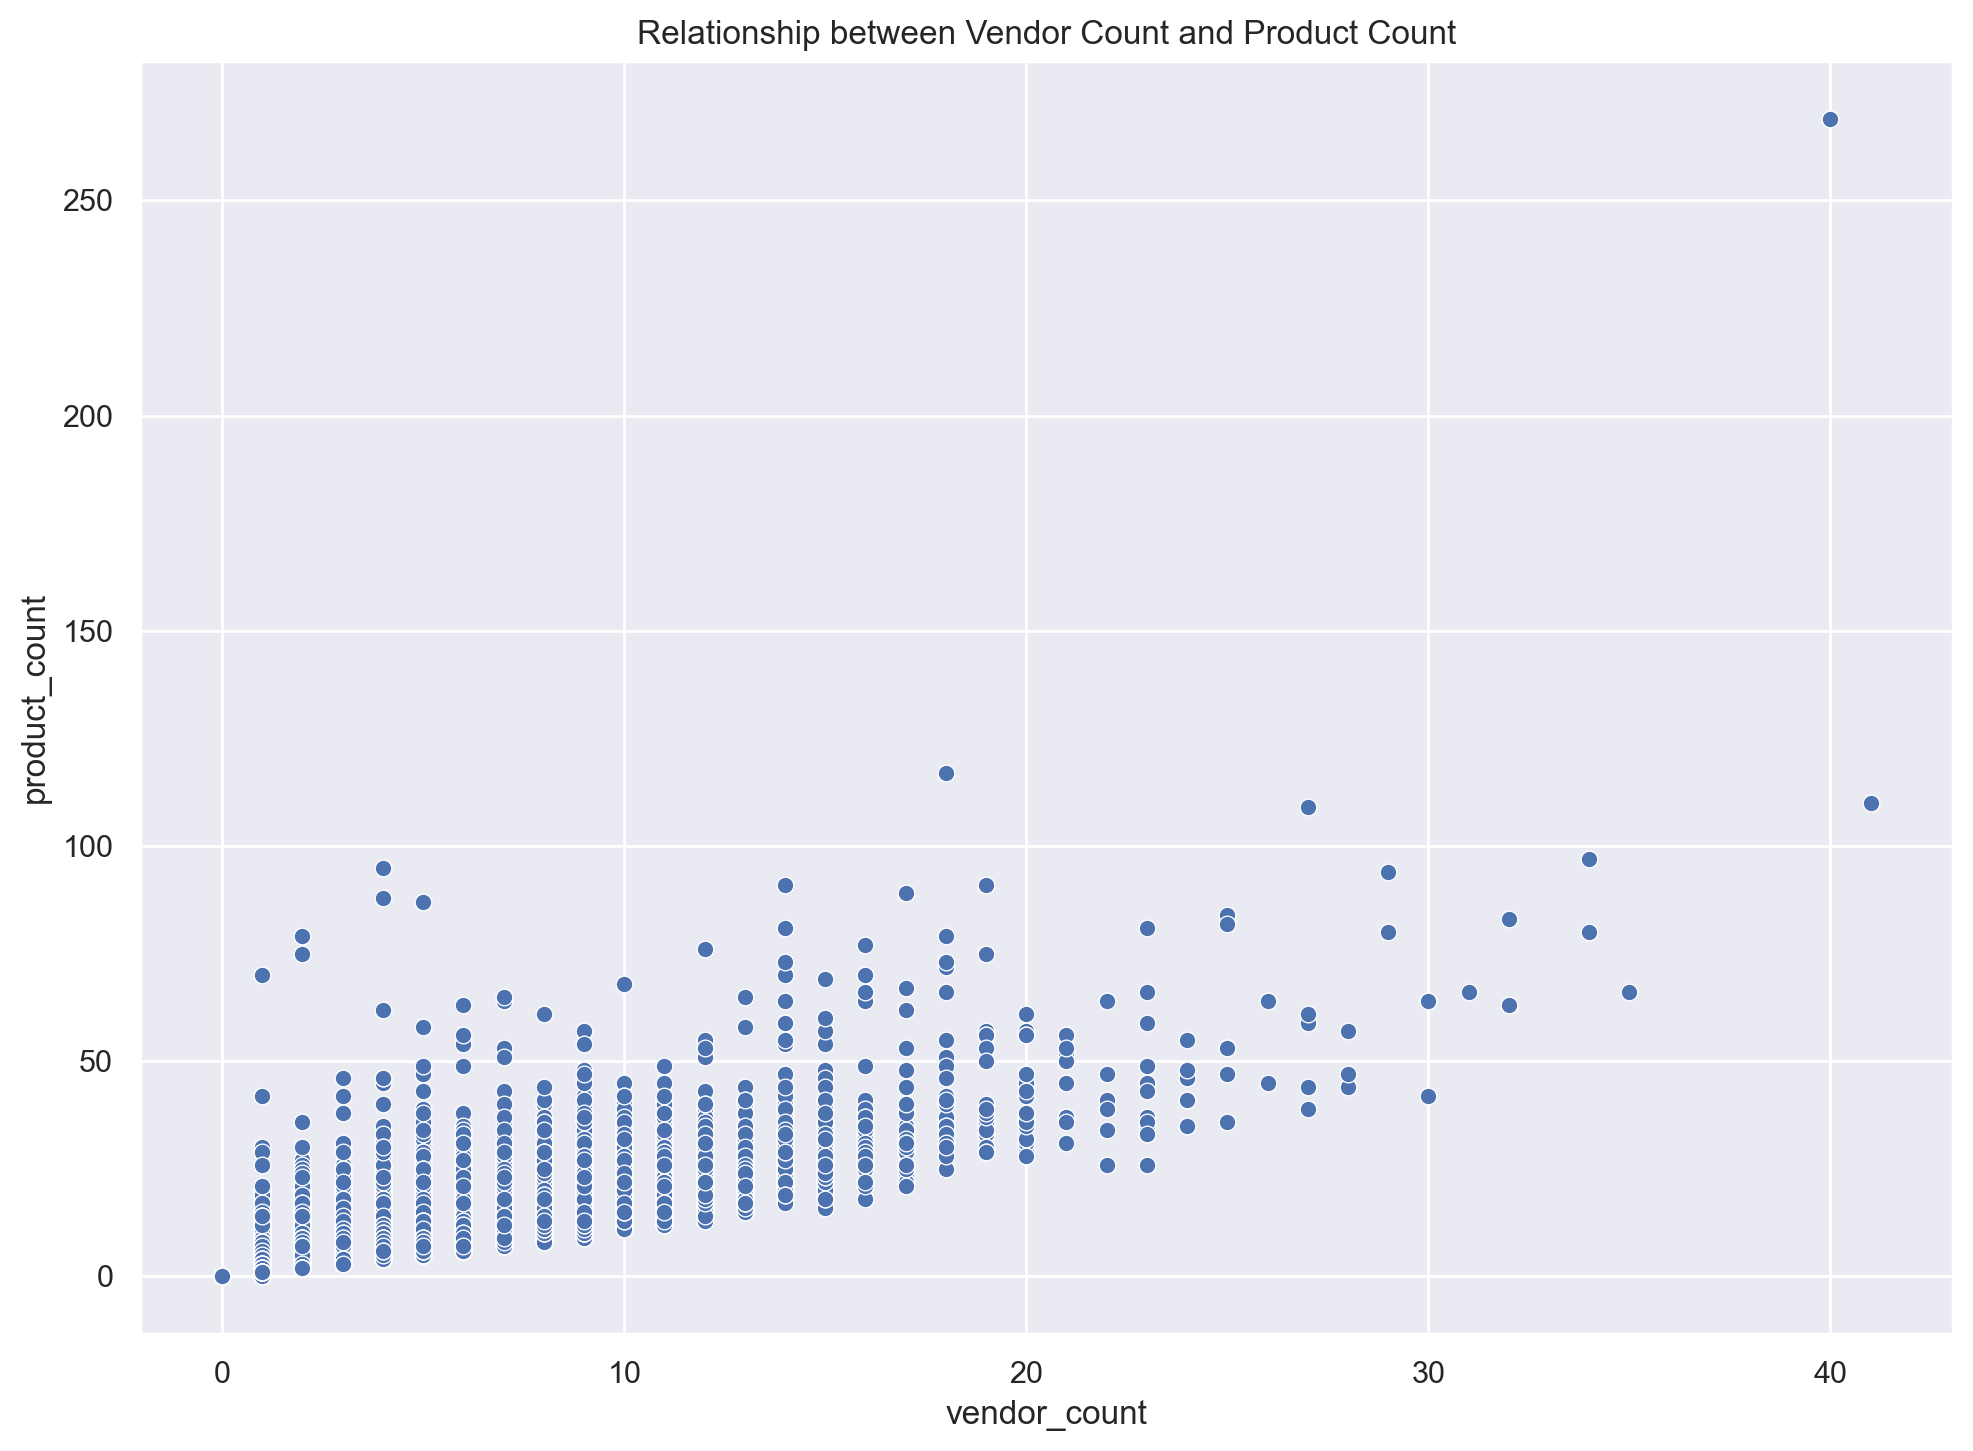

In [40]:
sns.scatterplot(x='vendor_count', y='product_count', data=df)
plt.title('Relationship between Vendor Count and Product Count')
plt.show()

### Exploring Day / Hour Order Patterns
* Day of The Week (number of orders per day of the week):

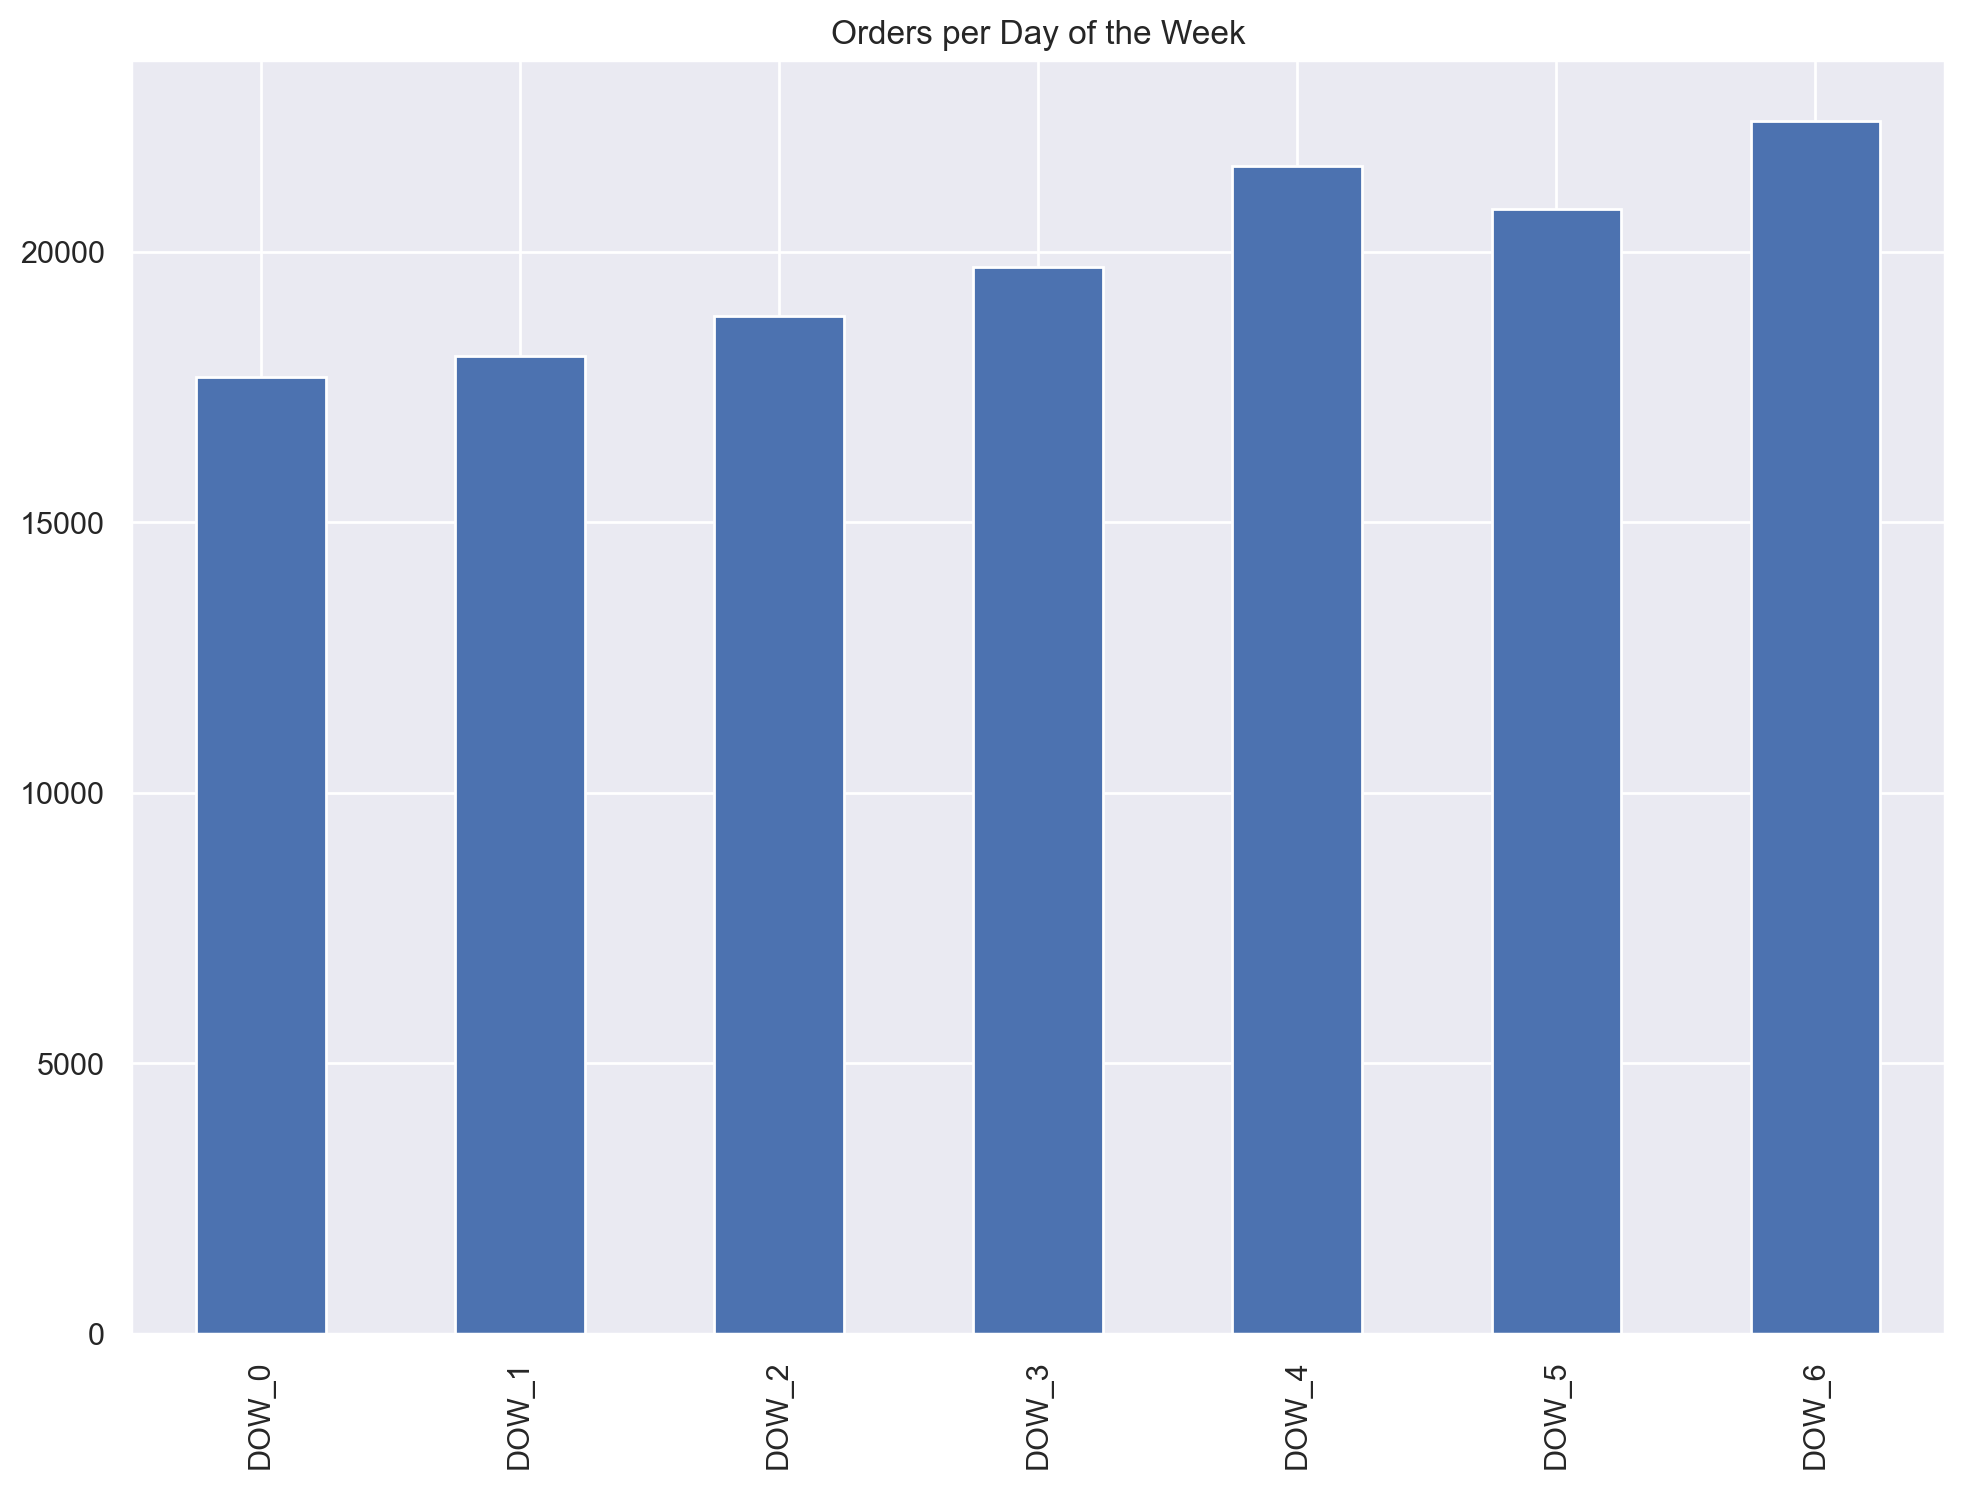

In [41]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
df[dow_columns].sum().plot(kind='bar', title='Orders per Day of the Week')
plt.show()

* Hour of The Day Analysis:

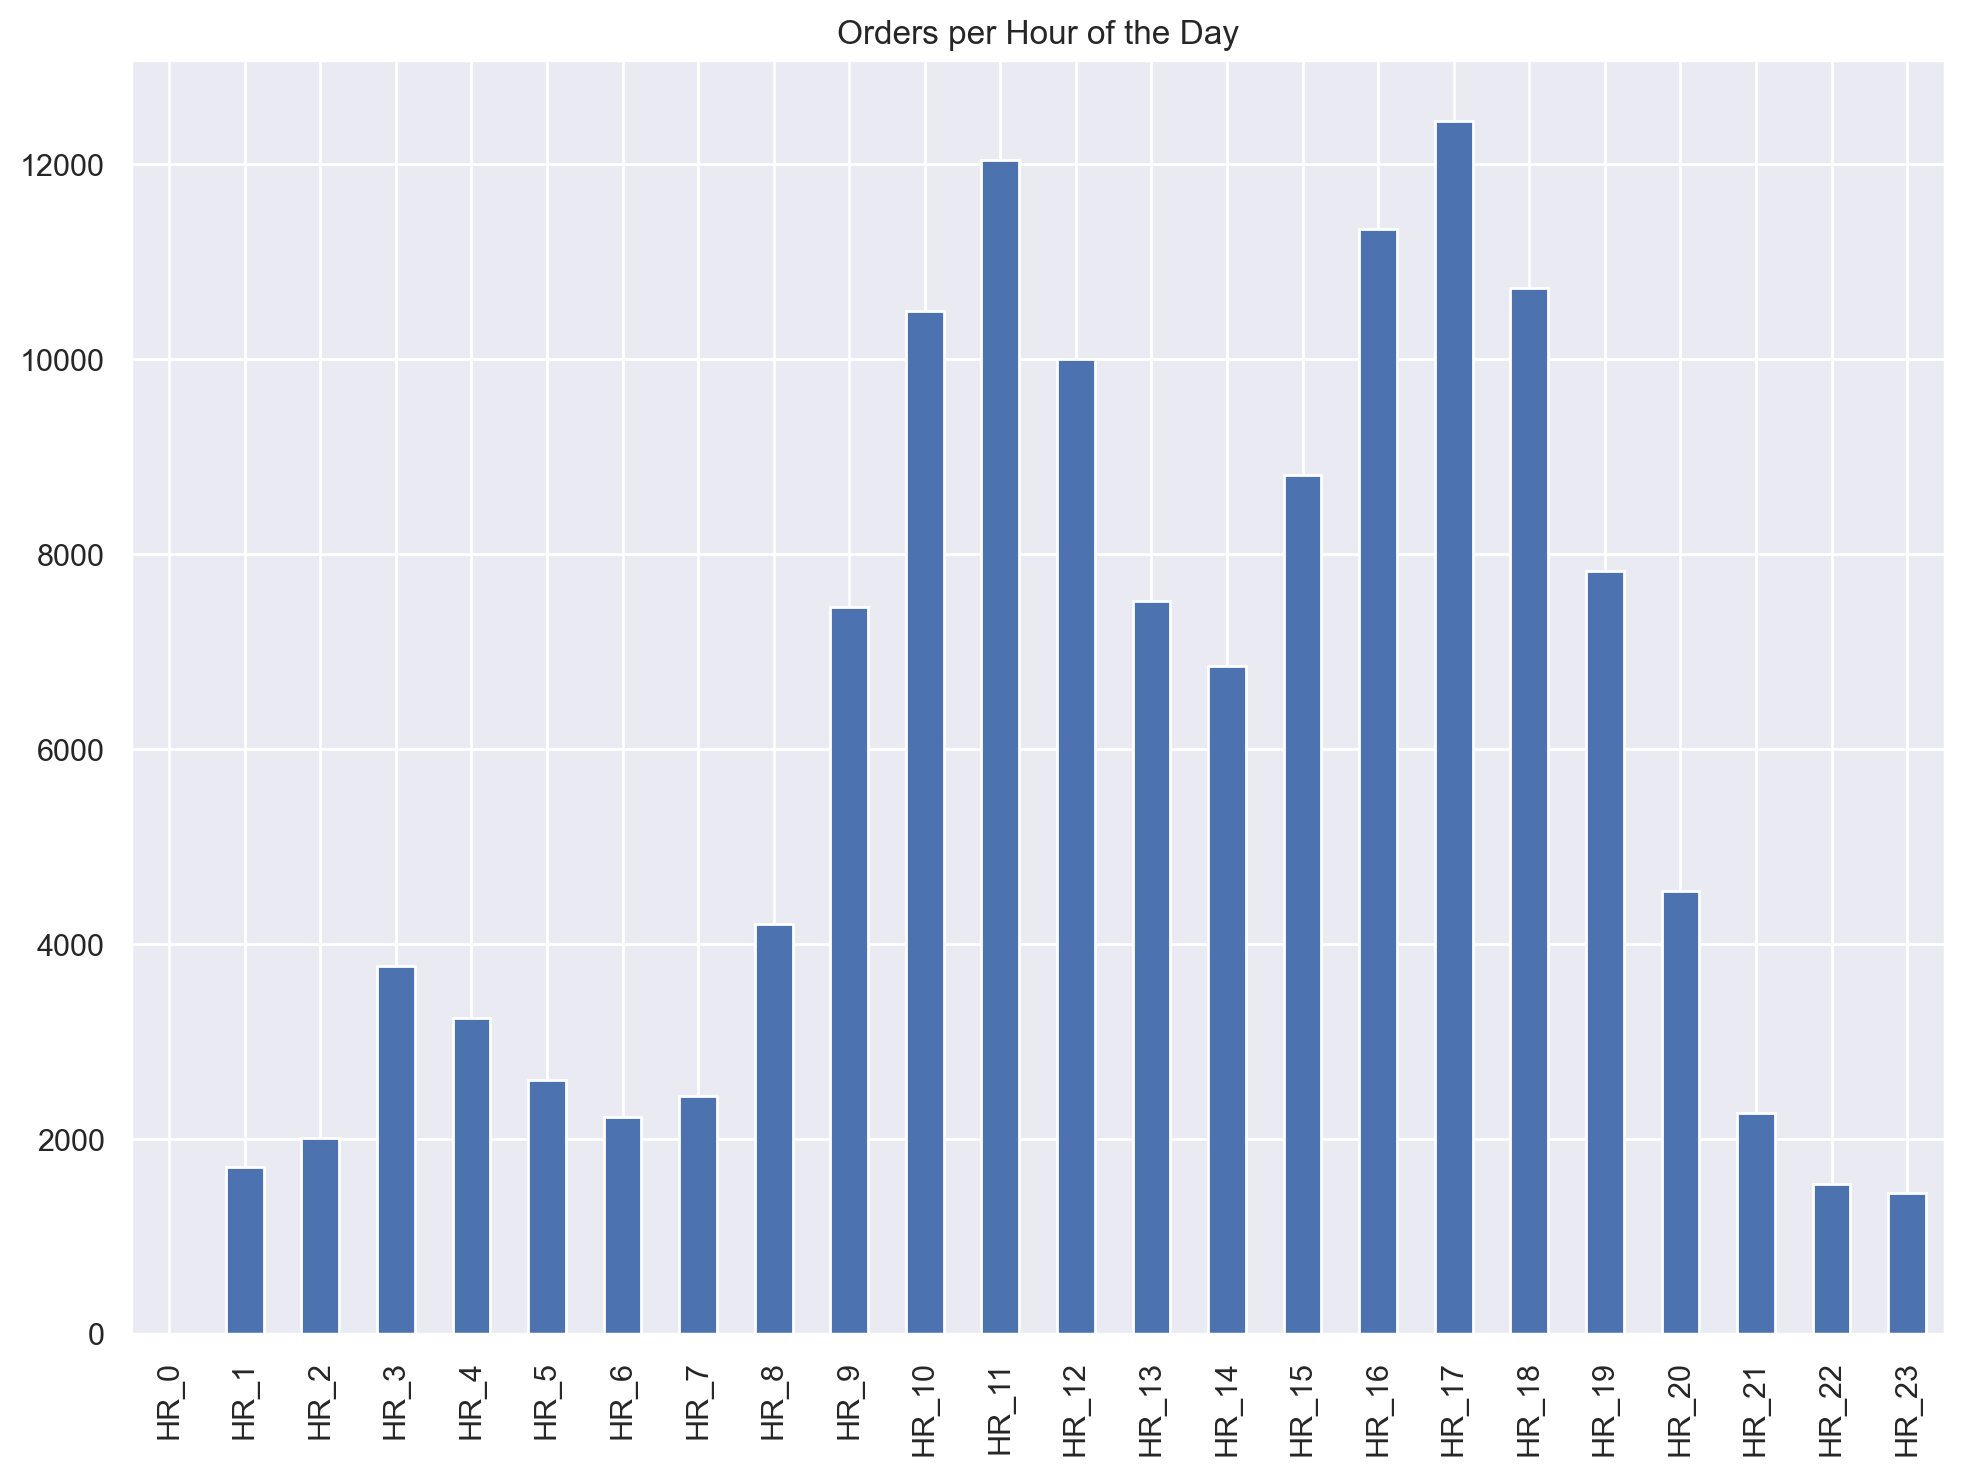

In [42]:
hr_columns = [f'HR_{i}' for i in range(24)]
df[hr_columns].sum().plot(kind='bar', title='Orders per Hour of the Day')
plt.show()


## Categorical Variables' Absolute Frequencies

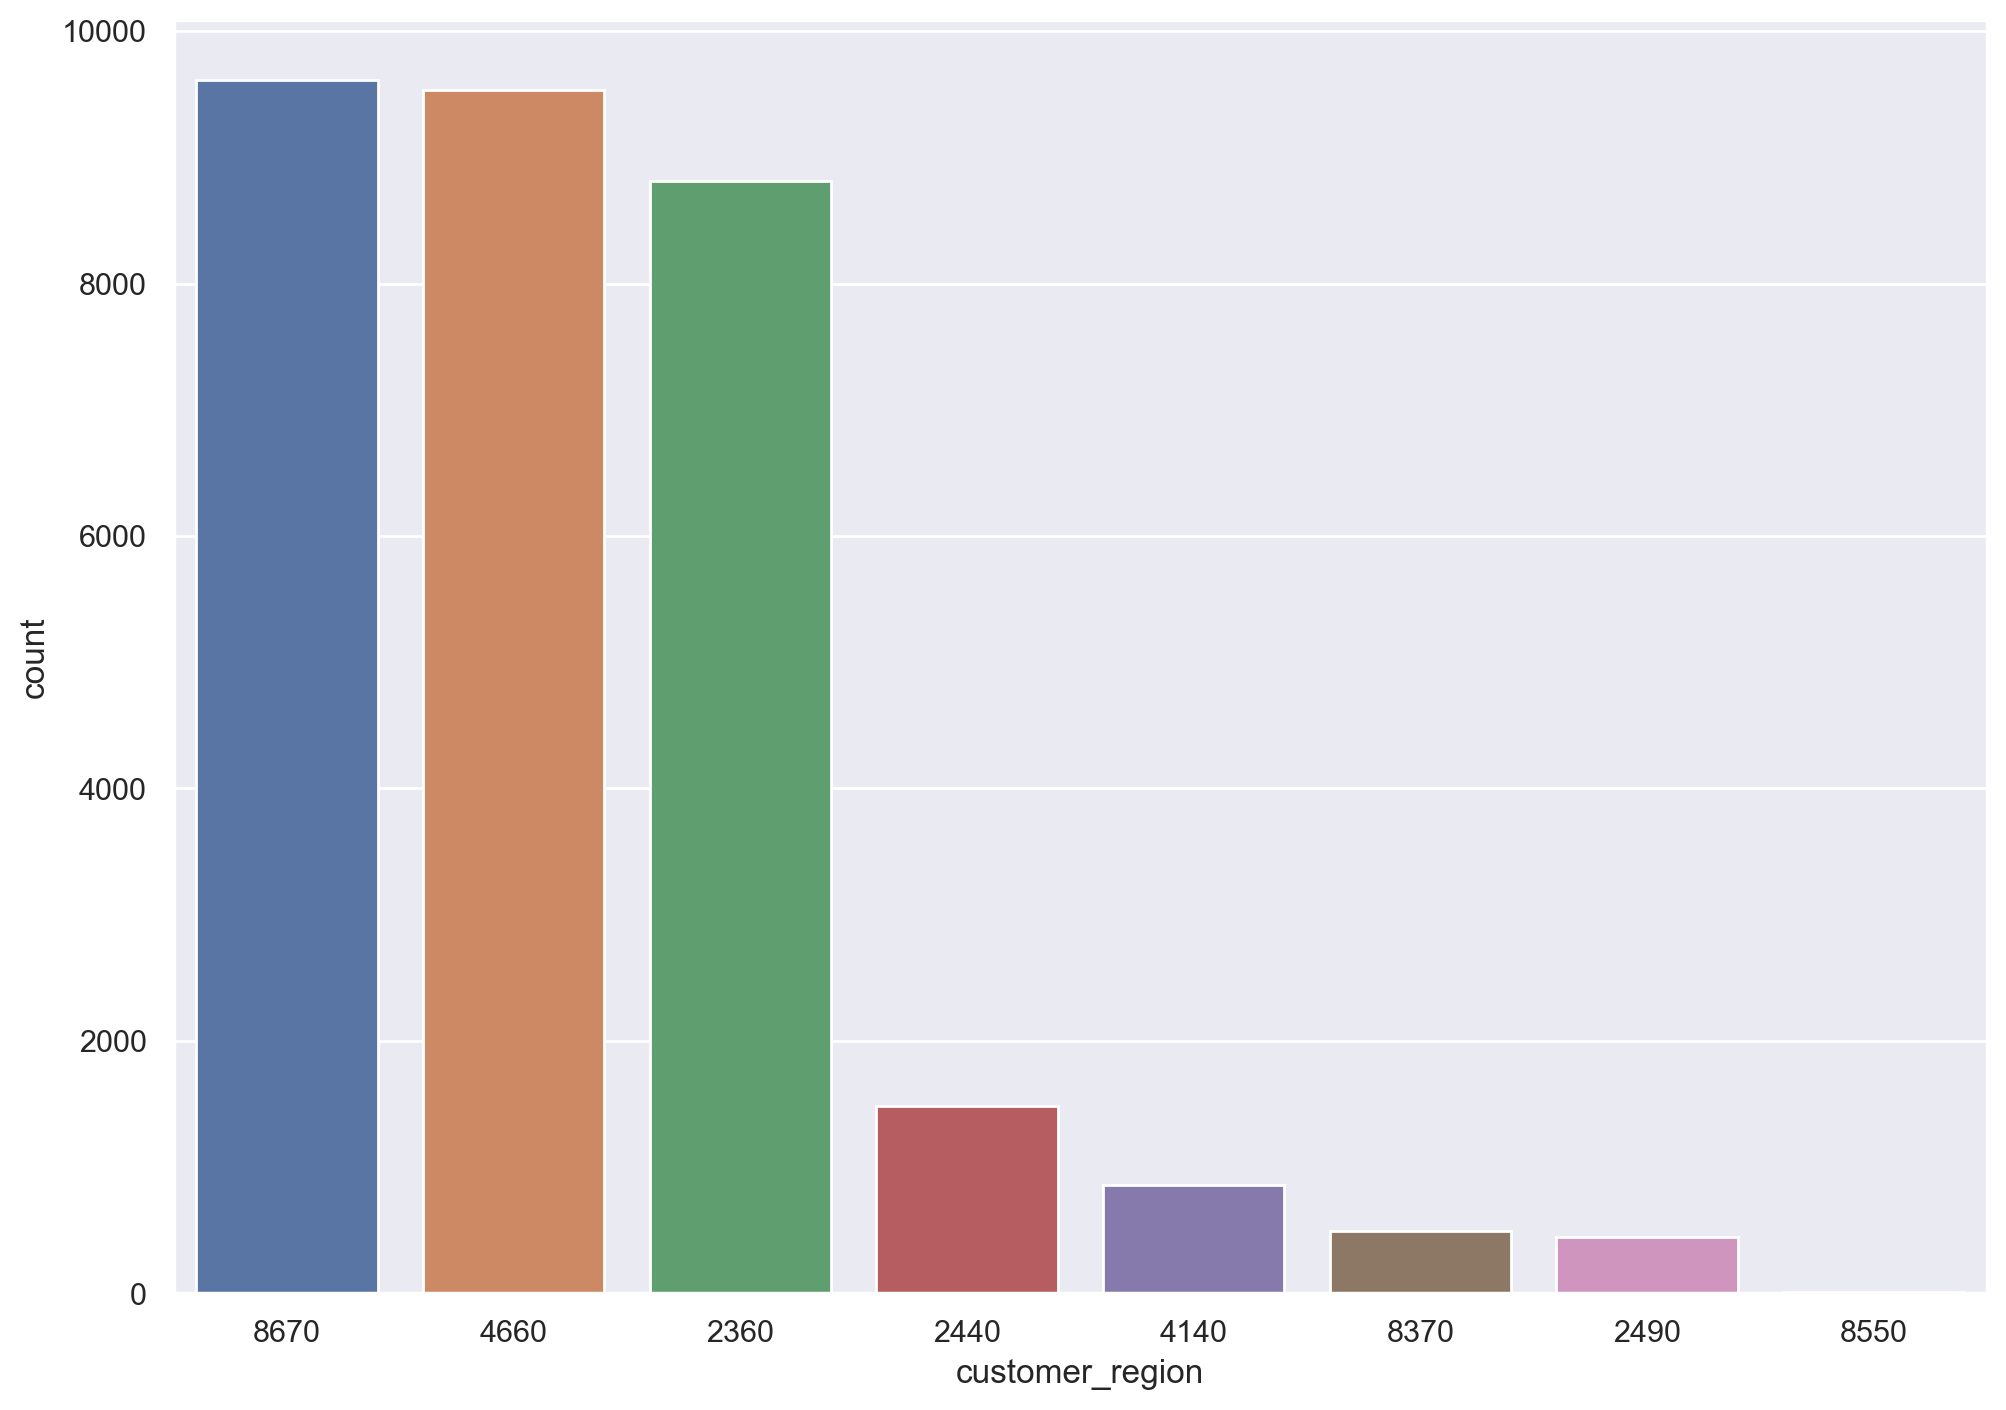

In [33]:
ordering = df["customer_region"].value_counts().index
sns.countplot(x=df["customer_region"], order = ordering)
plt.show()

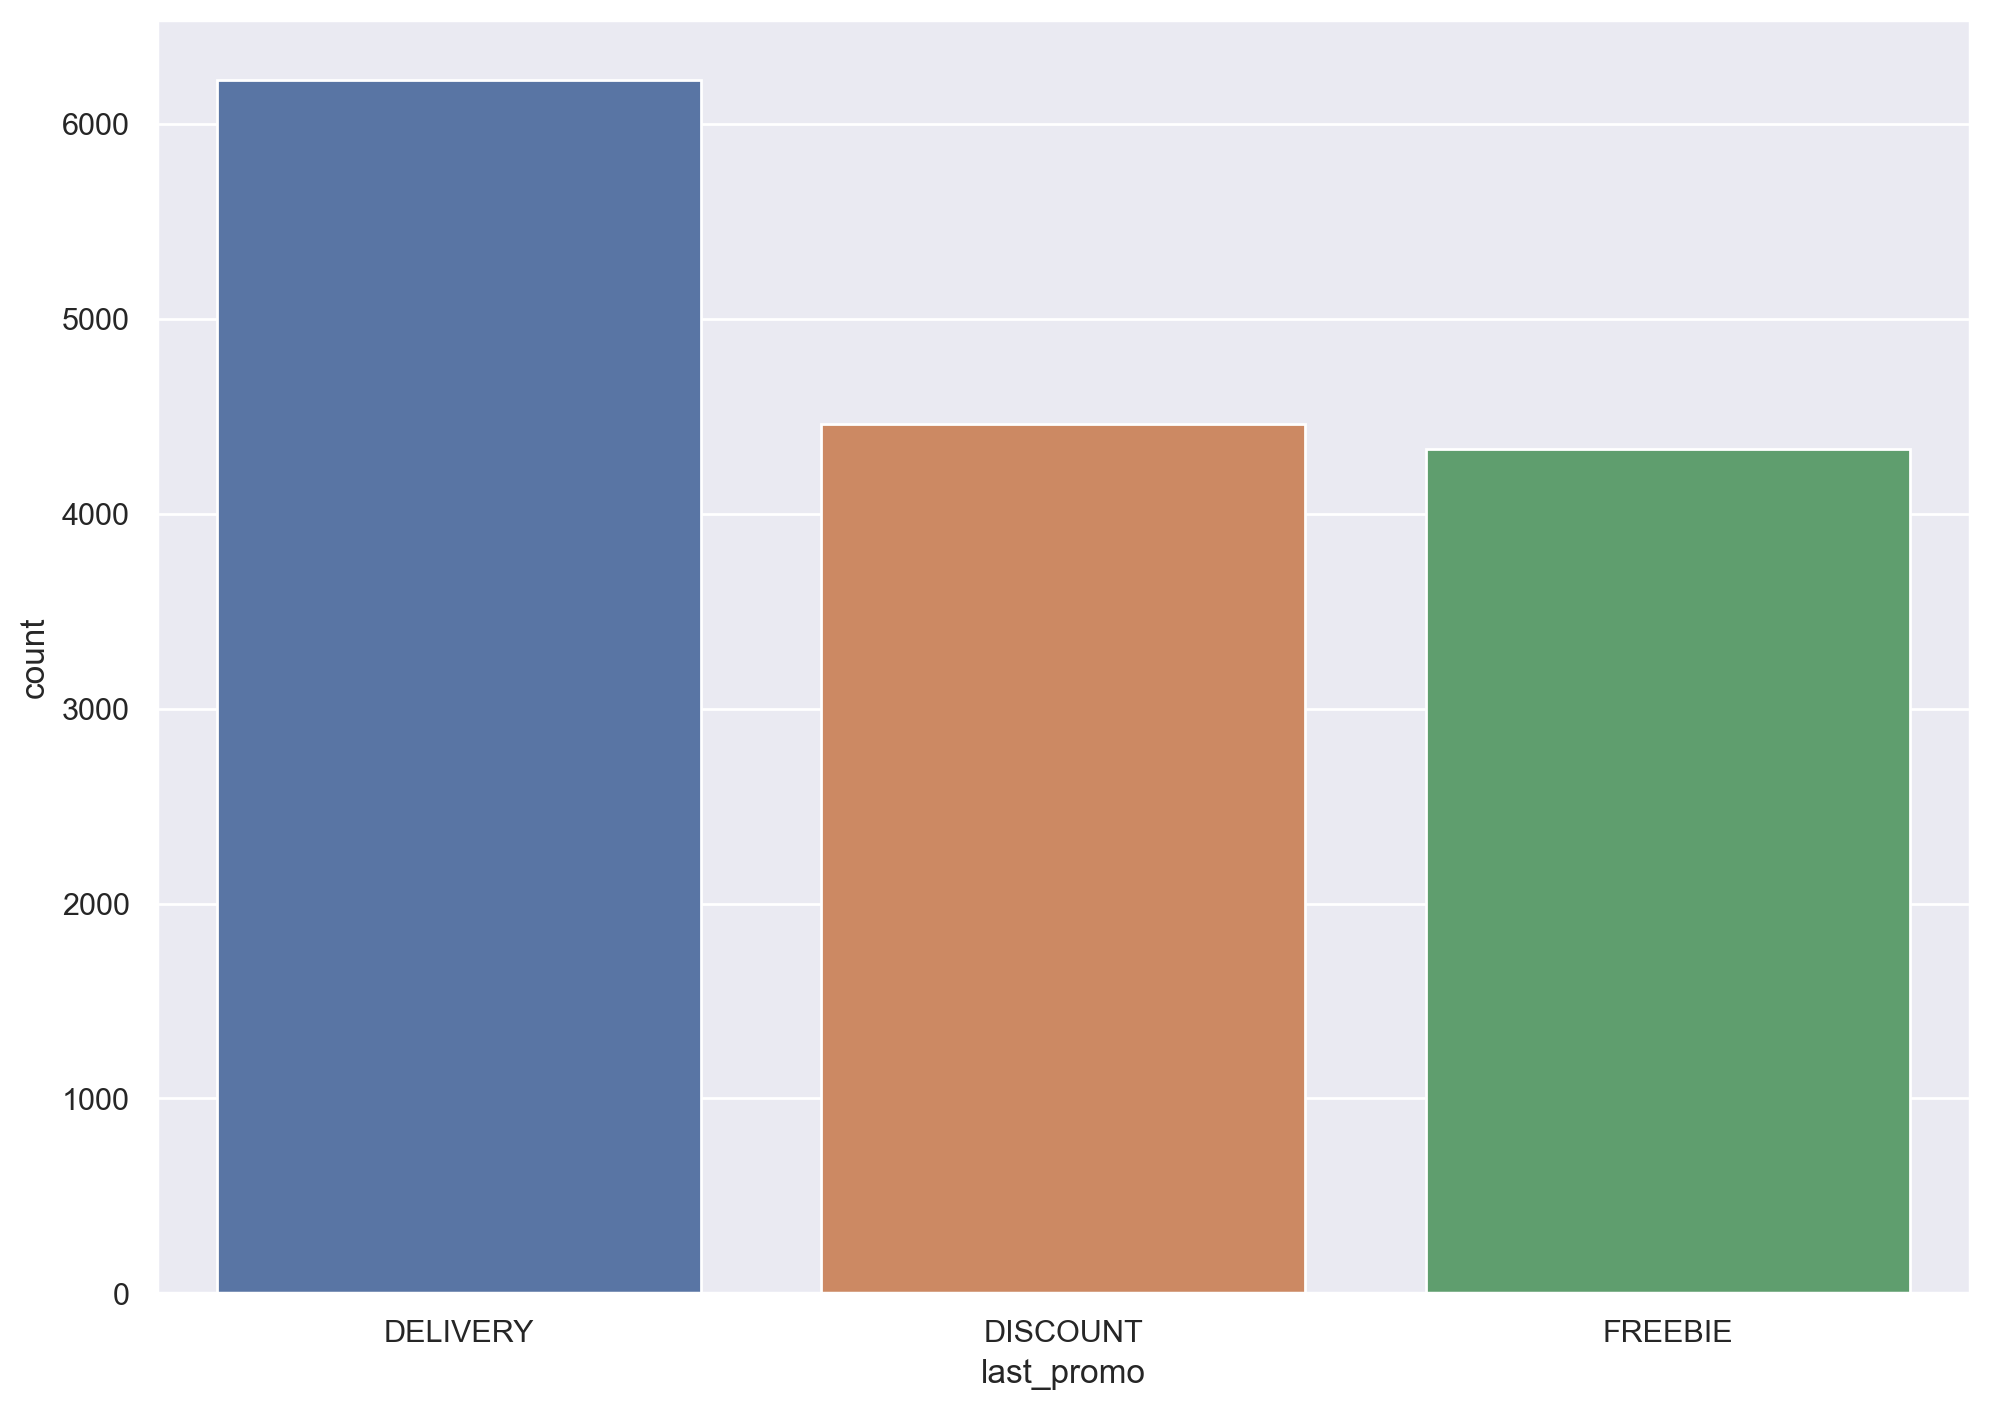

In [32]:
ordering = df["last_promo"].value_counts().index
sns.countplot(x=df["last_promo"], order = ordering)
plt.show()

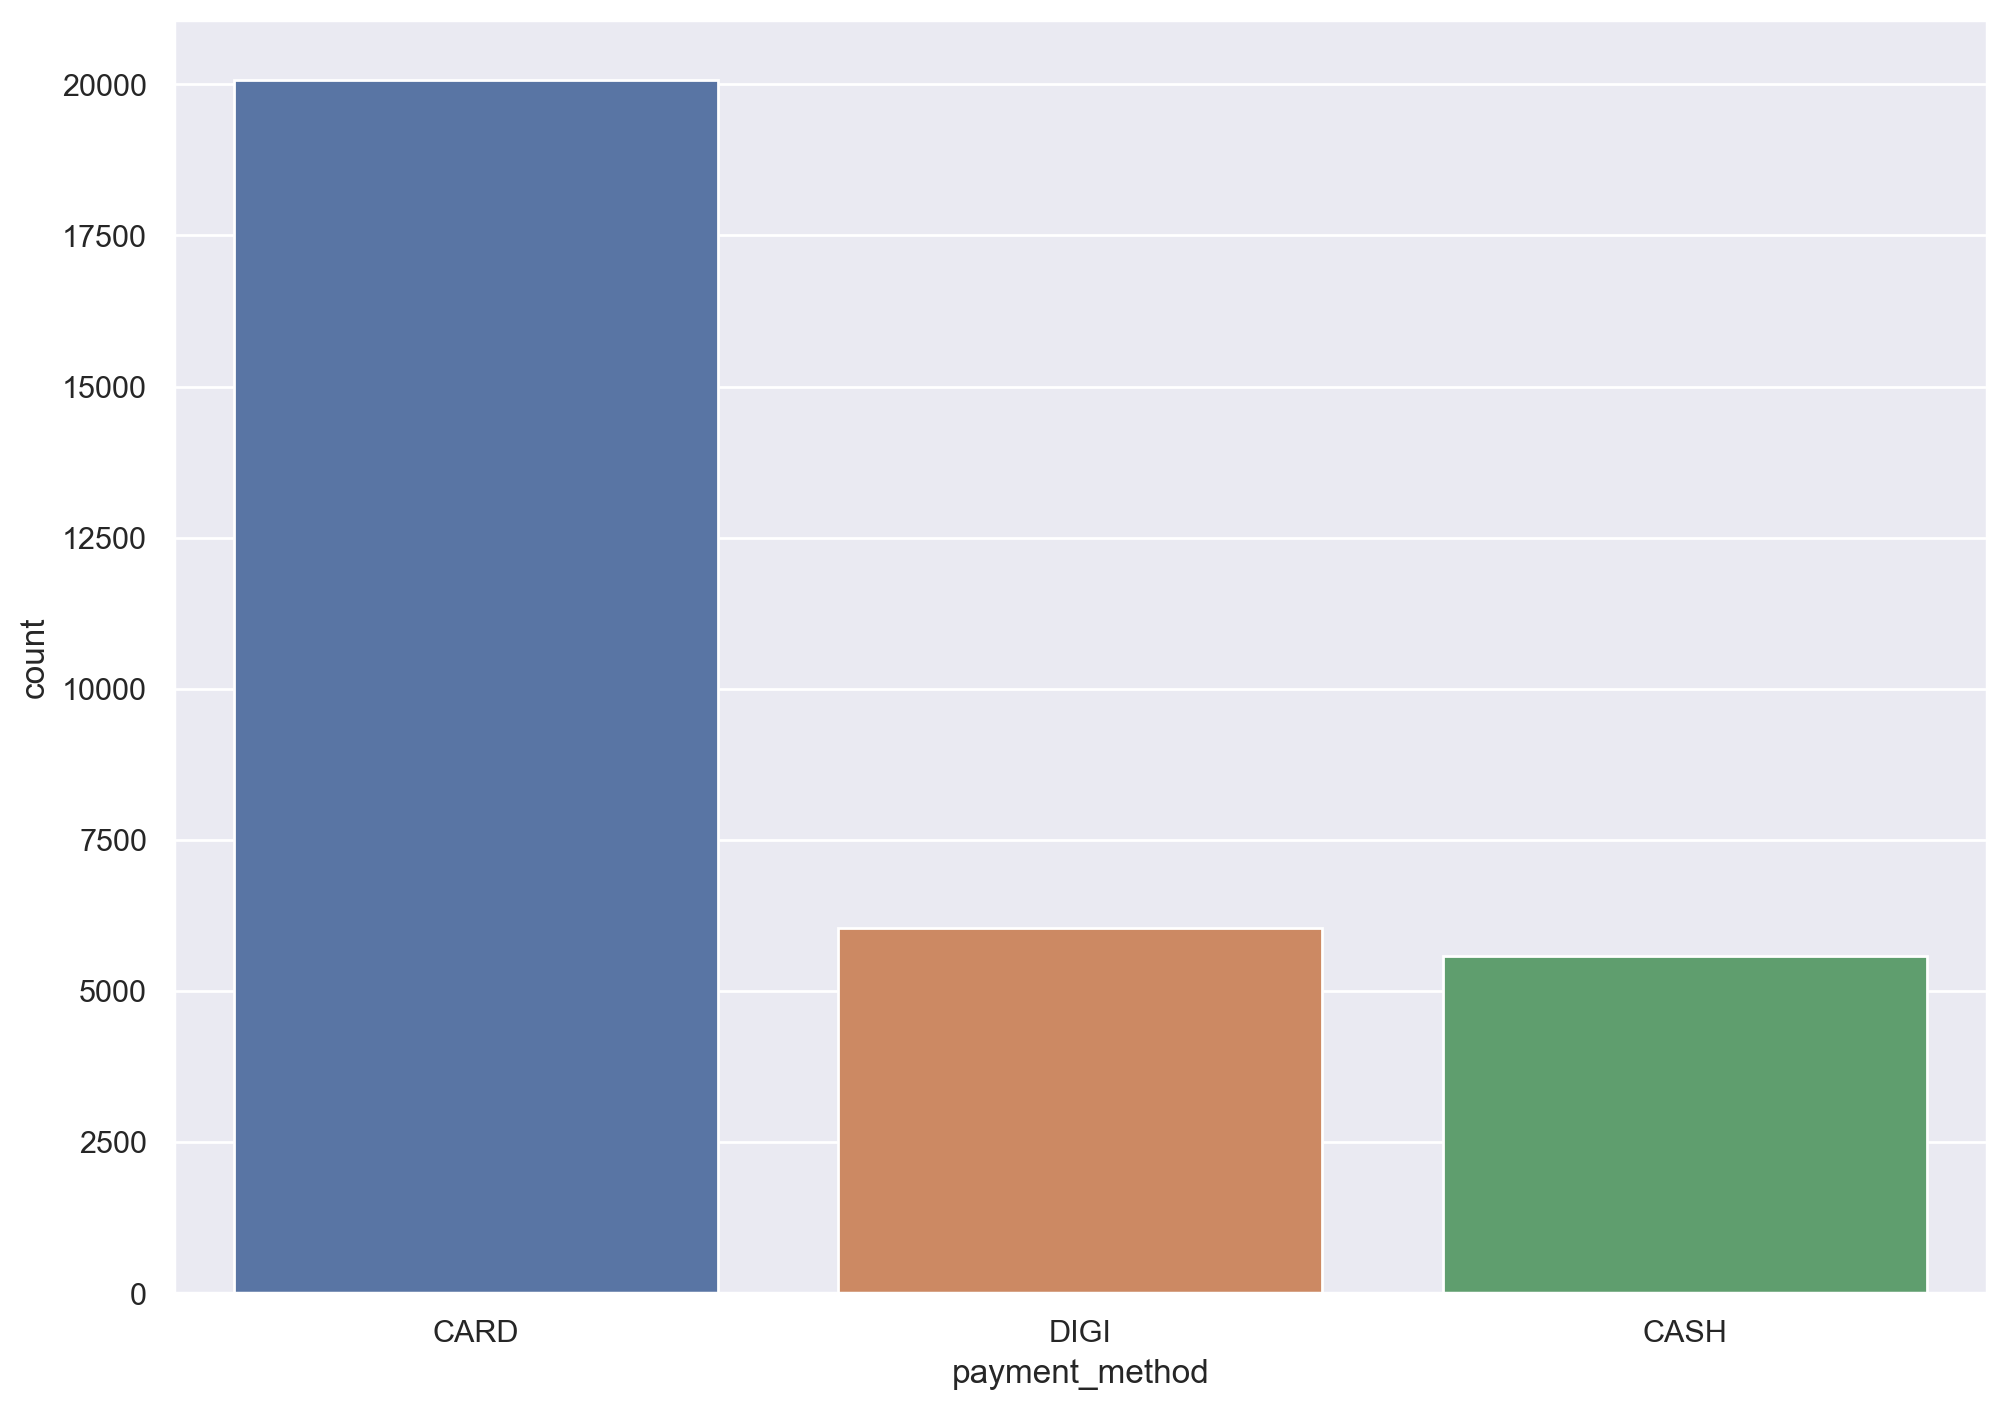

In [31]:
ordering = df["payment_method"].value_counts().index
sns.countplot(x=df["payment_method"], order = ordering)
plt.show()

* Cuisine-related columns, can be analyzed by calculating total spending per cuisine to determine preferences:

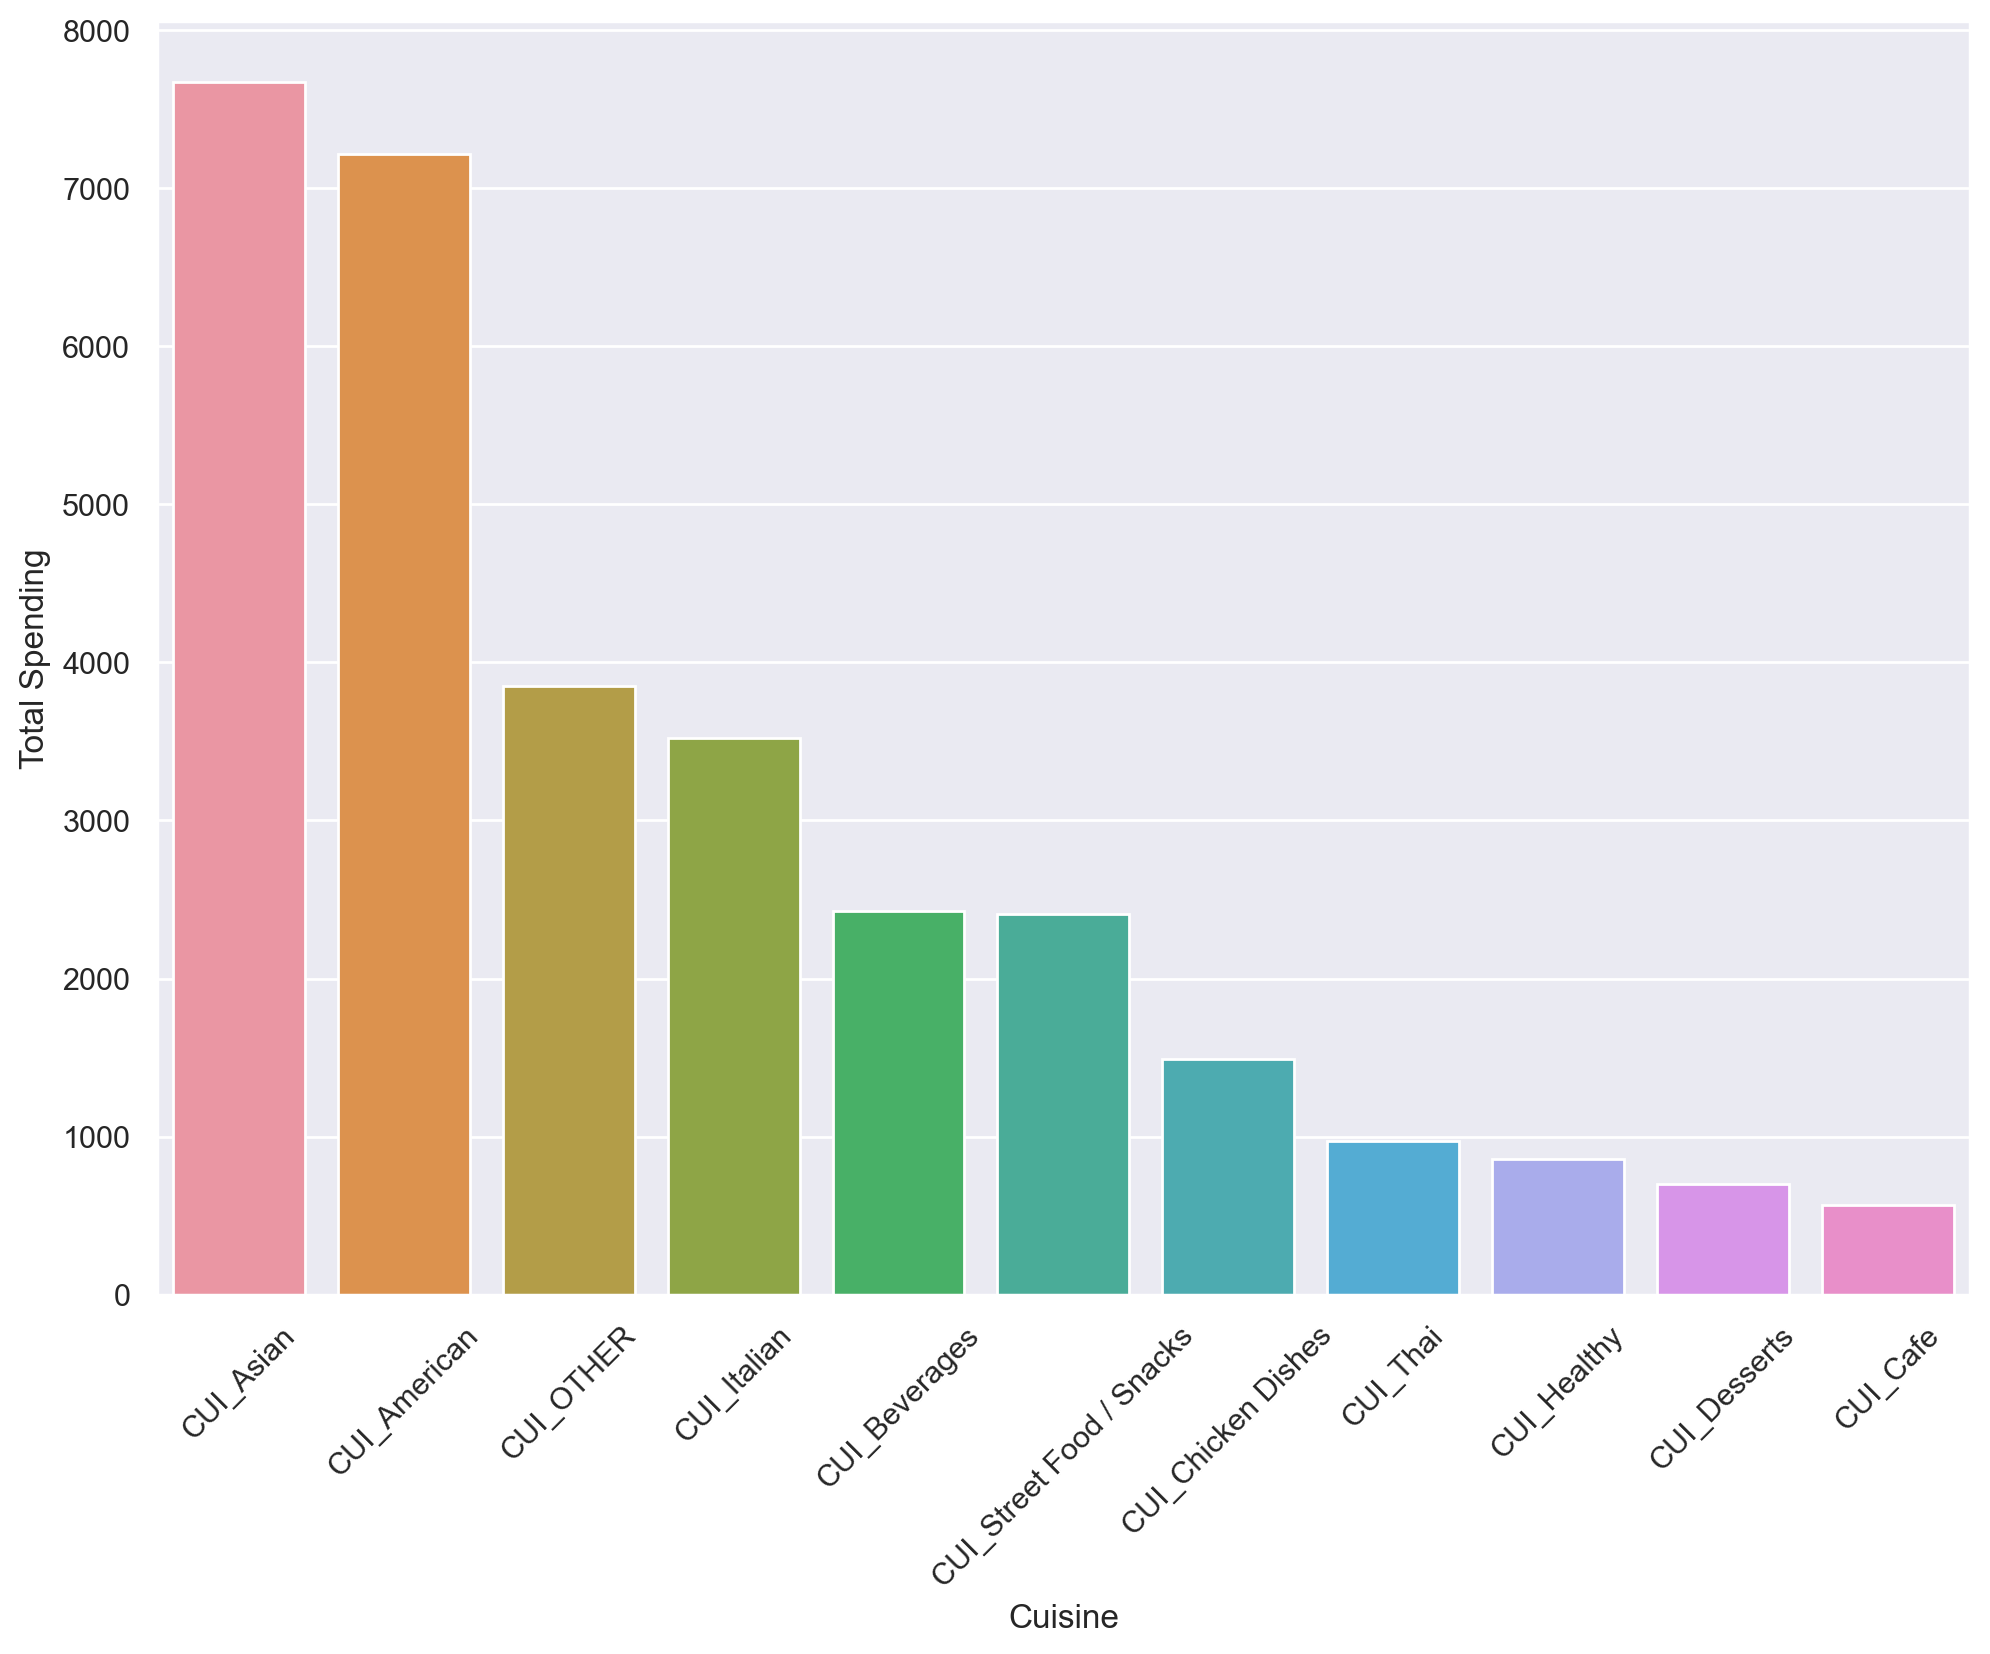

In [25]:
ordering = df["Fav_Cuisine"].value_counts().index
sns.countplot(x=df["Fav_Cuisine"], order = ordering)
plt.xticks(rotation=45)
plt.ylabel('Total Spending')
plt.xlabel('Cuisine')
plt.show()

### Correlation Analysis
* Exploring relationship between numerical features:

In [15]:
# Replace any placeholders like '-' with NaN
df.replace('-', np.nan, inplace=True)

In [16]:
numeric_df = df.select_dtypes(include=[np.number])

In [17]:
numeric_df.fillna(numeric_df.median(), inplace=True)

#### Metric Variables' Correlation Matrix

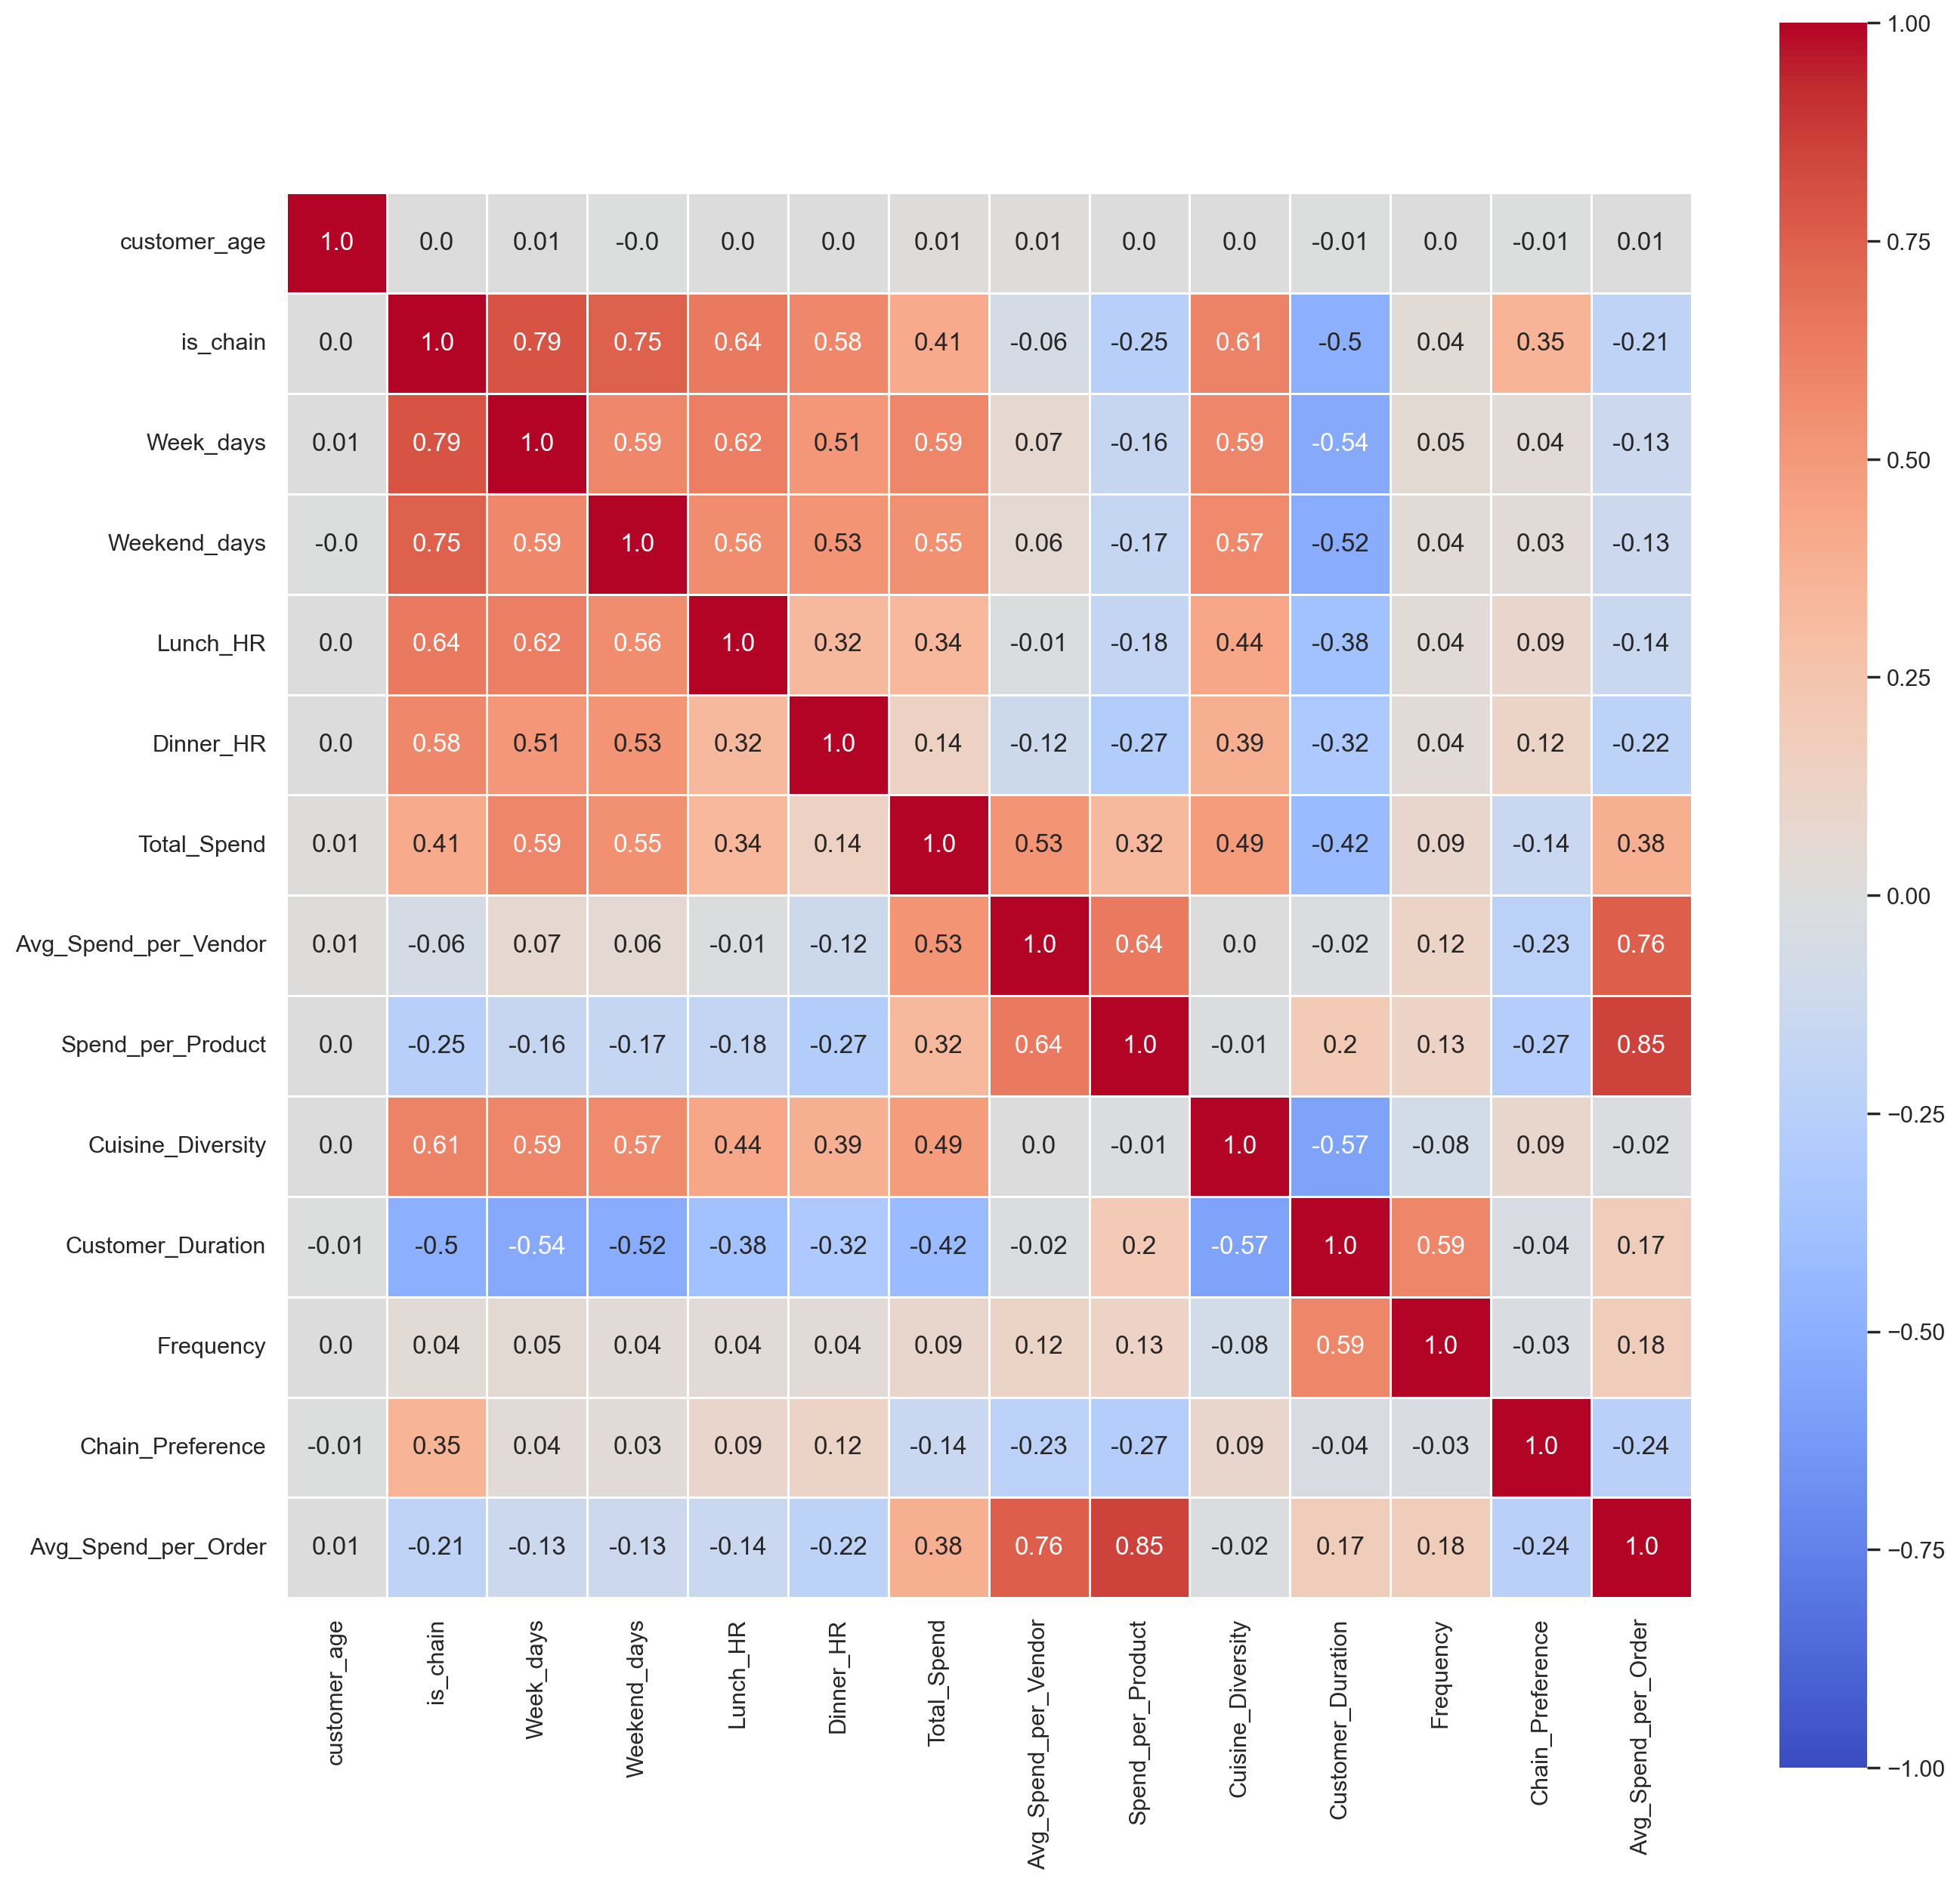

In [76]:
df_filtered = df[variables]

corr = df_filtered.corr()
annot = corr.round(2).astype(str) 

# Prepare figure
fig = plt.figure(figsize=(15, 15))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot,  # Specify custom annotation
            fmt='s',  # The annotation matrix now has strings, so we need to explicitly say this
            
            ########## 
            vmin=-1, vmax=1, center=0, 
            ########## 
            square=True, linewidths=.5,  
            ########## 3c.
            cmap='coolwarm' 
           )

plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

### Comparing two categorical variables

<Axes: xlabel='customer_region'>

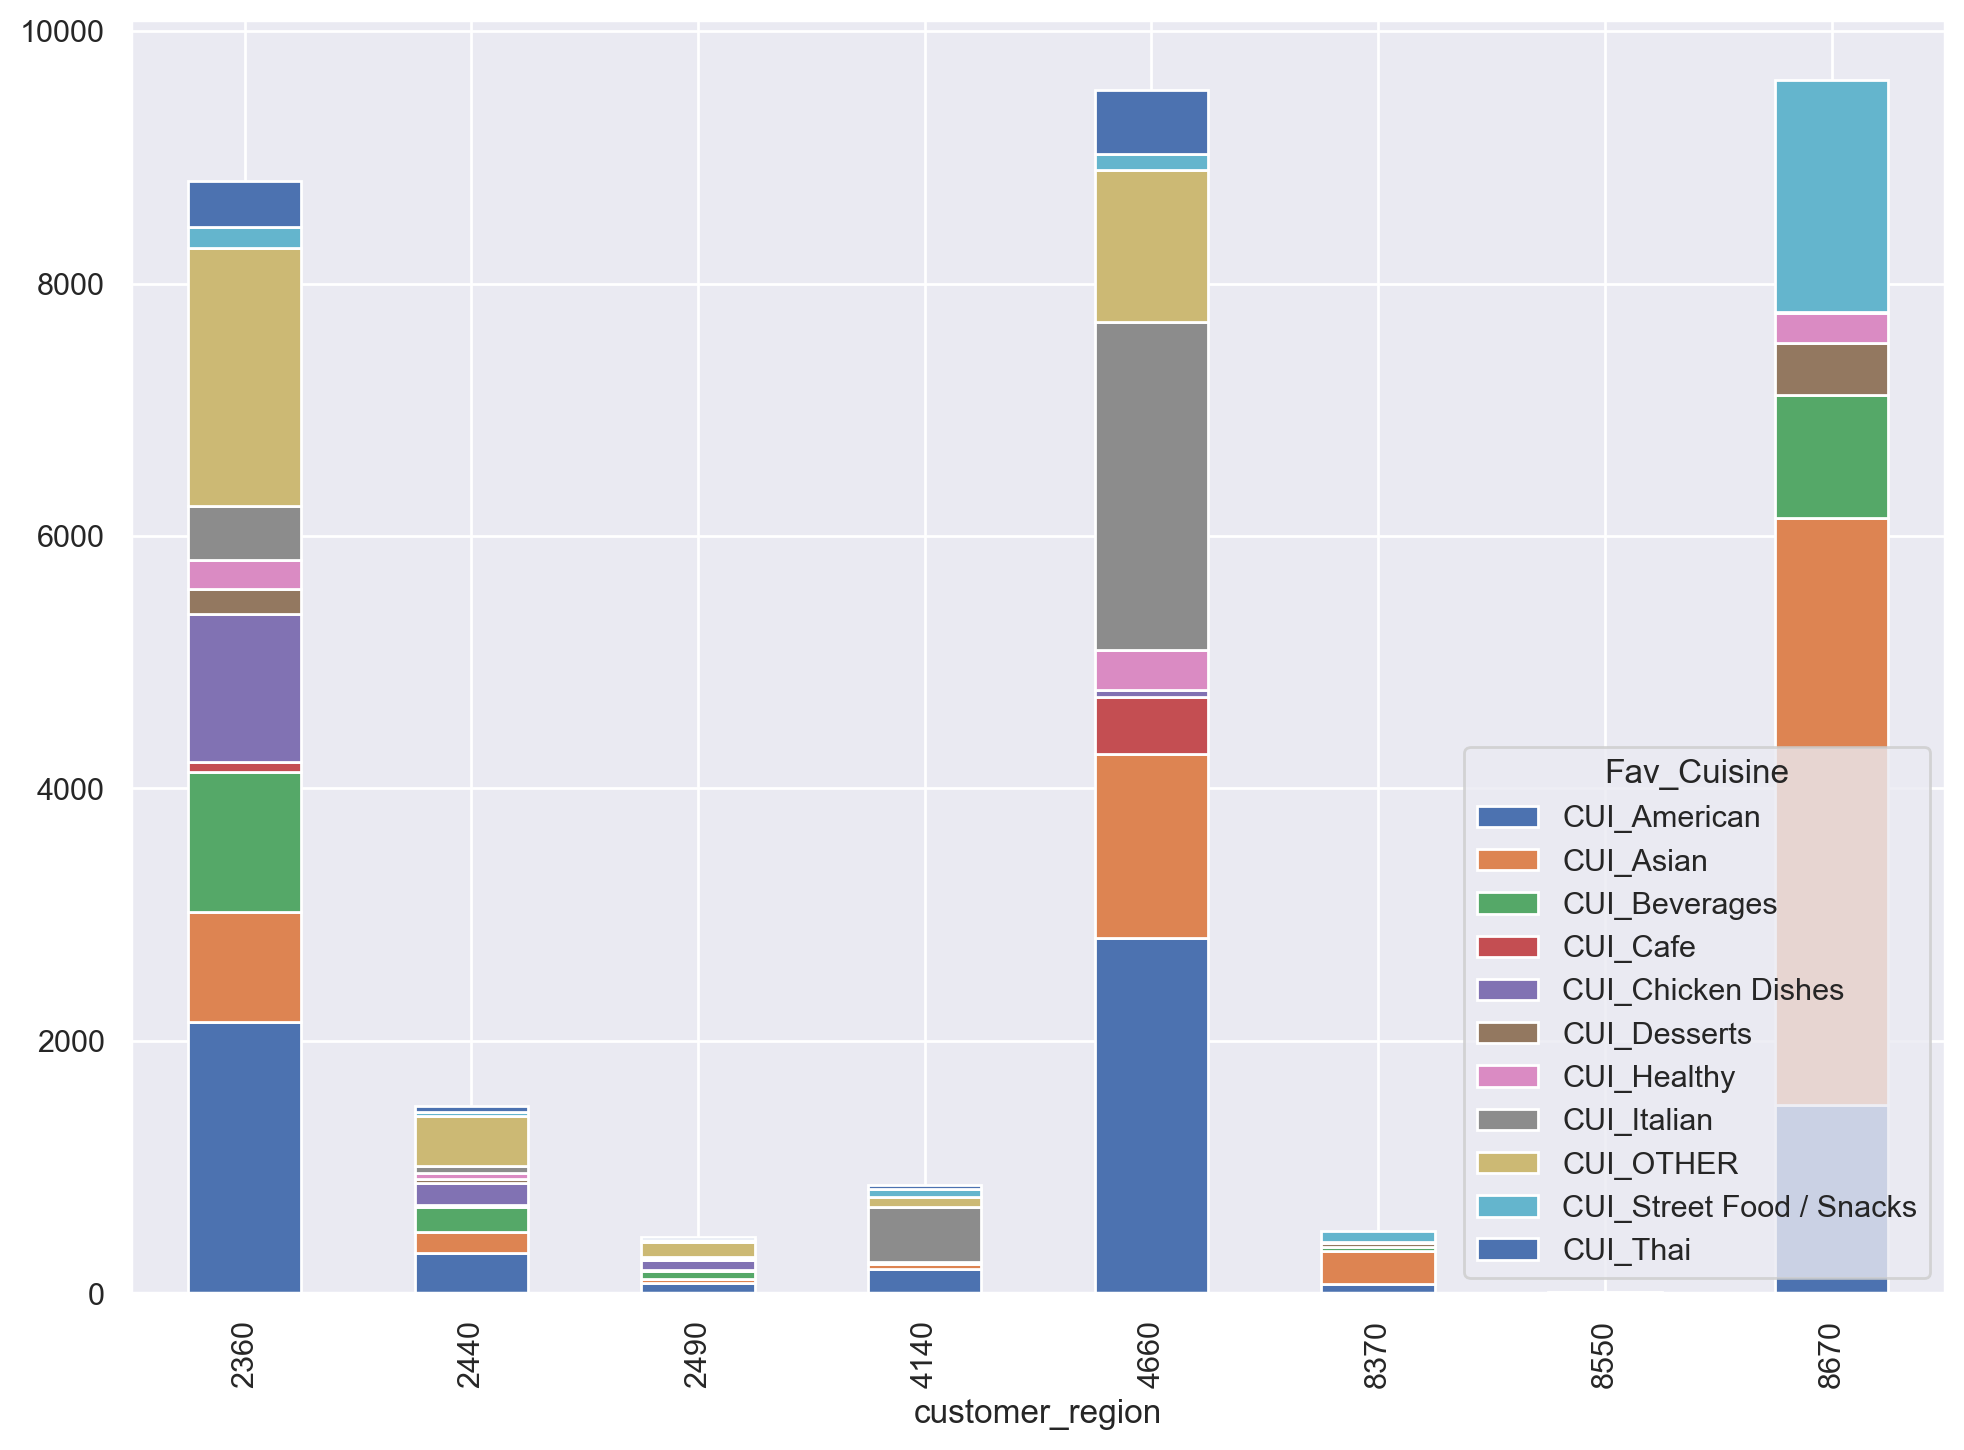

In [29]:
# see the most popular cuisine per region
df.groupby('customer_region')['Fav_Cuisine'].value_counts().unstack().plot(kind='bar', stacked=True)

### Comparing a categorical variable to a numeric one

In [24]:
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Frequency','Chain_Preference', 'Avg_Spend_per_Order']
variables

['customer_age',
 'is_chain',
 'Week_days',
 'Weekend_days',
 'Lunch_HR',
 'Dinner_HR',
 'Total_Spend',
 'Avg_Spend_per_Vendor',
 'Spend_per_Product',
 'Cuisine_Diversity',
 'Customer_Duration',
 'Frequency',
 'Chain_Preference',
 'Avg_Spend_per_Order']

In [22]:
non_metric_features

['customer_region', 'last_promo', 'payment_method', 'Fav_Cuisine']

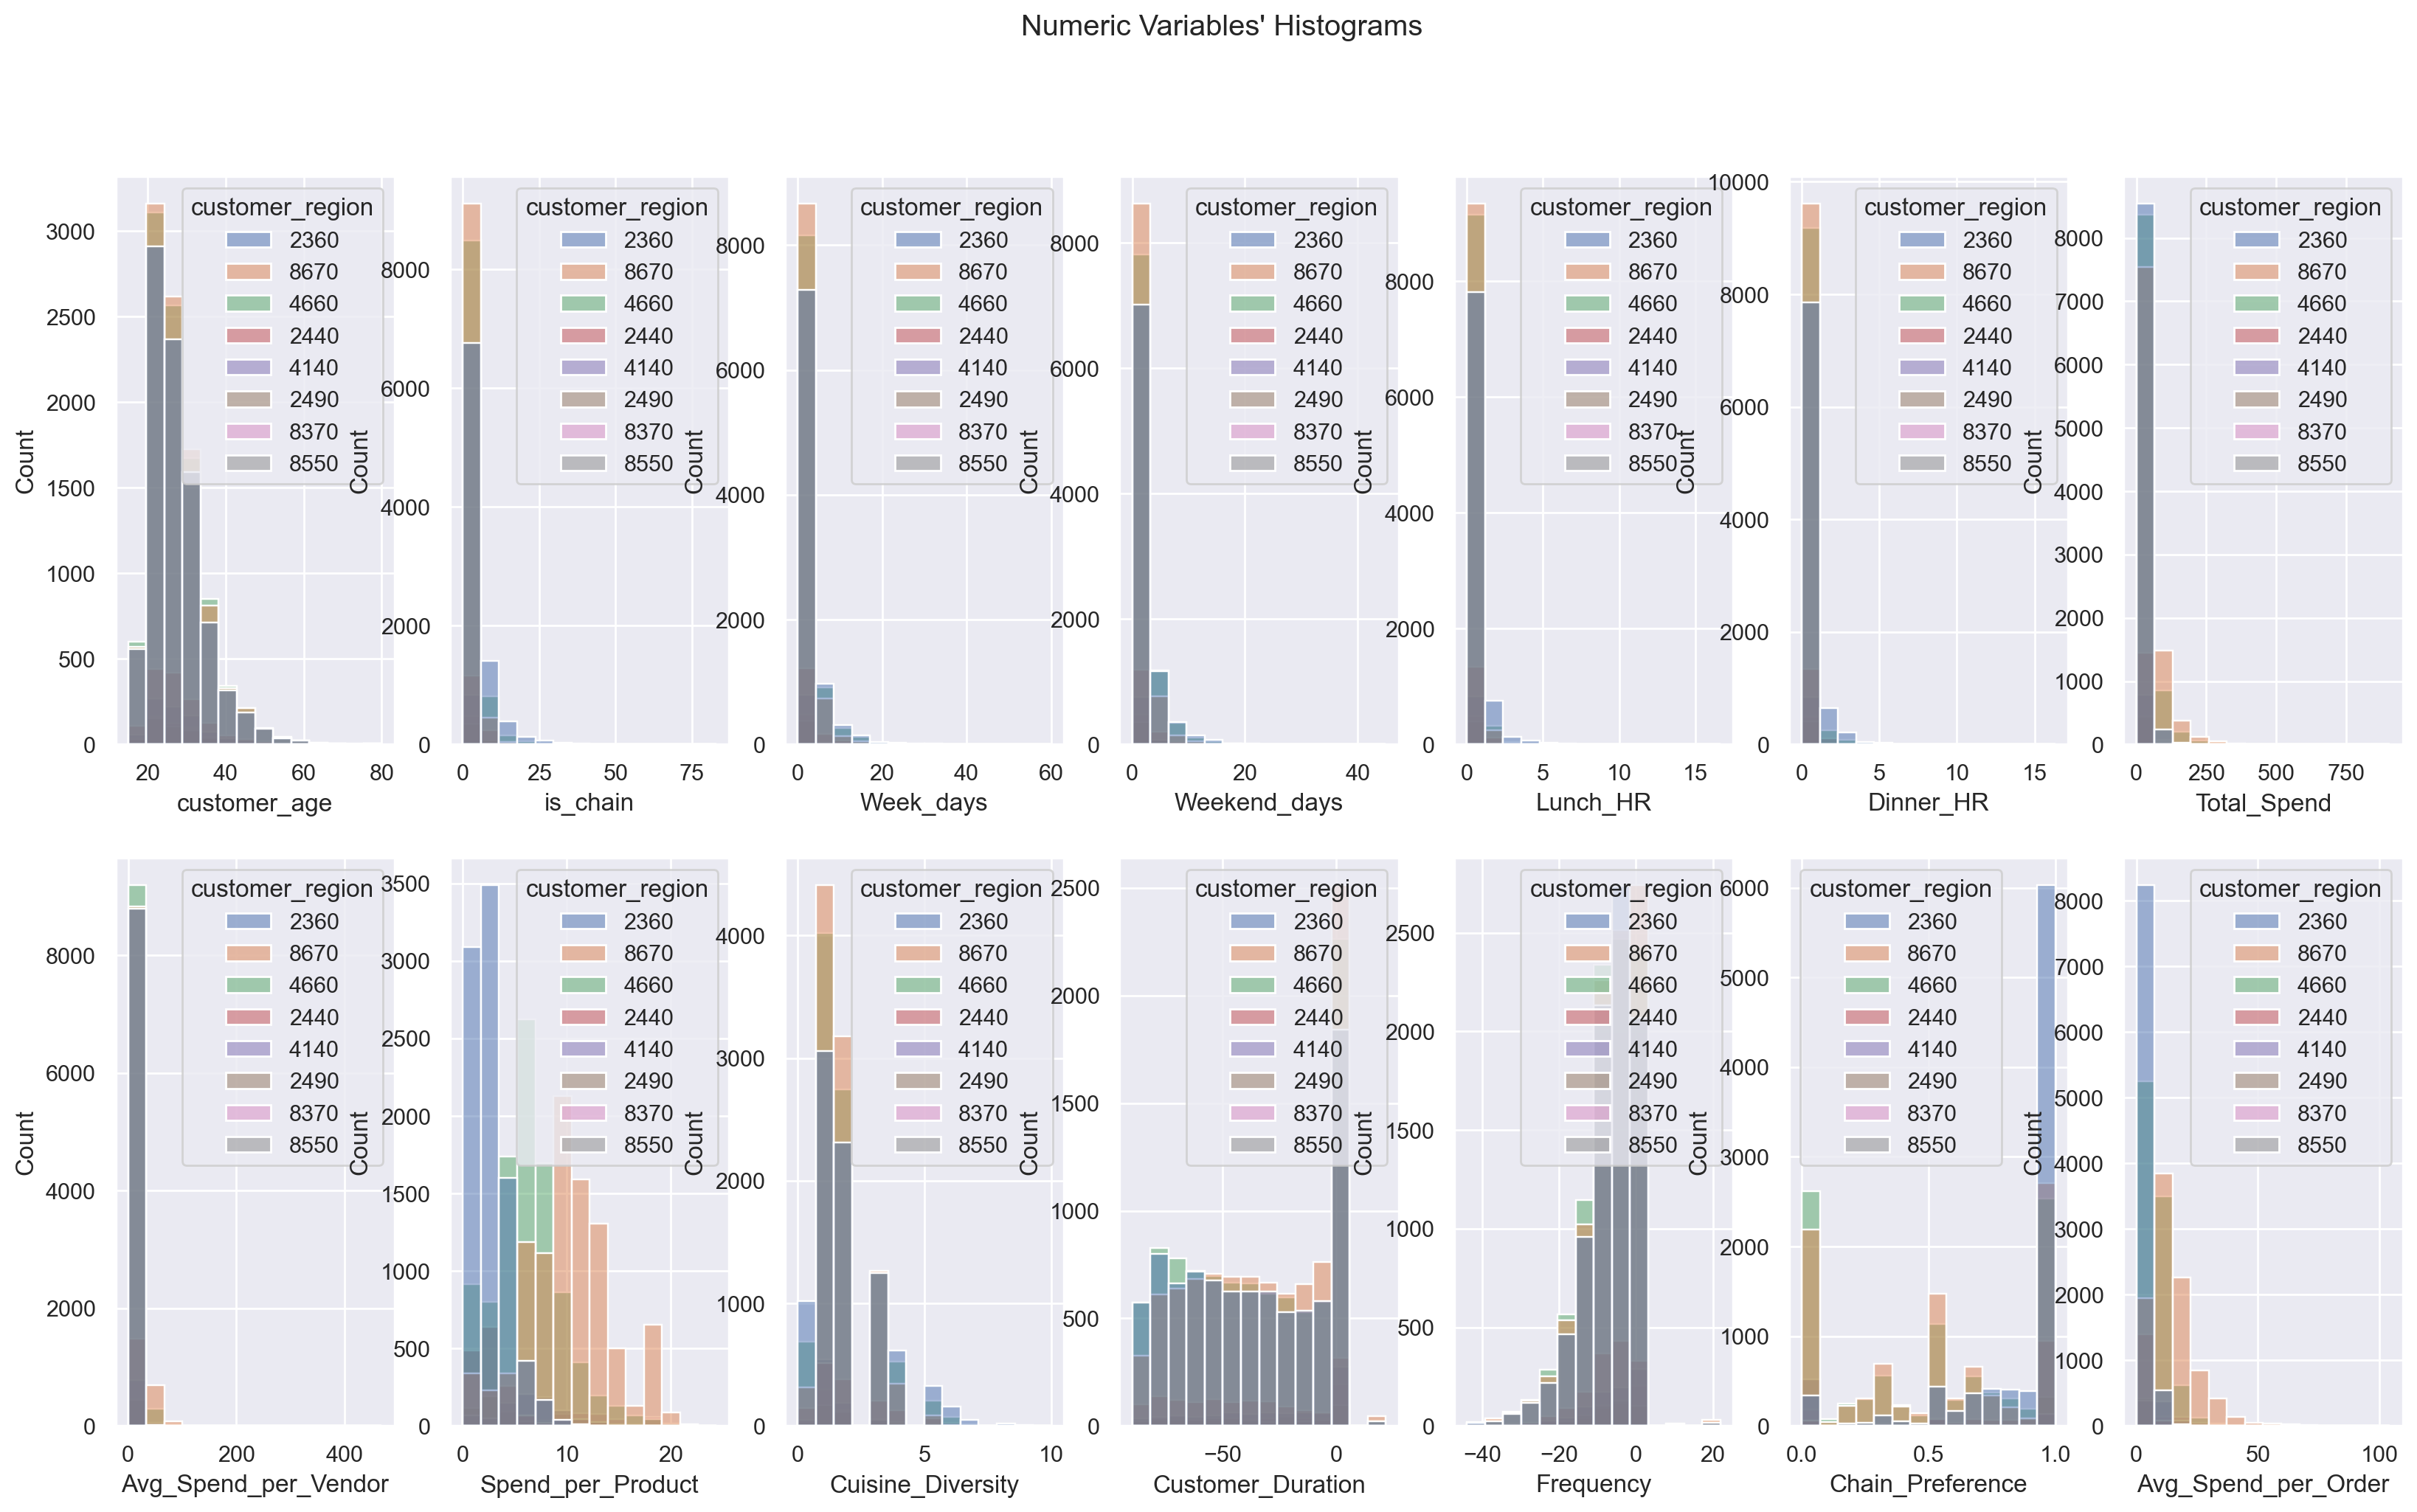

In [29]:
sp_rows = 2
sp_cols = 7


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), variables): 
    sns.histplot(df, x=feat, ax=ax, bins=14, hue='customer_region')
    
# Layout
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

On the figure above, it's specially interisting to analyse the 1st and the 9th graphs. A majority of our customer base is from the same region and the amount of money people spend per product also depends a lot on their region

(0.0, 500.0)

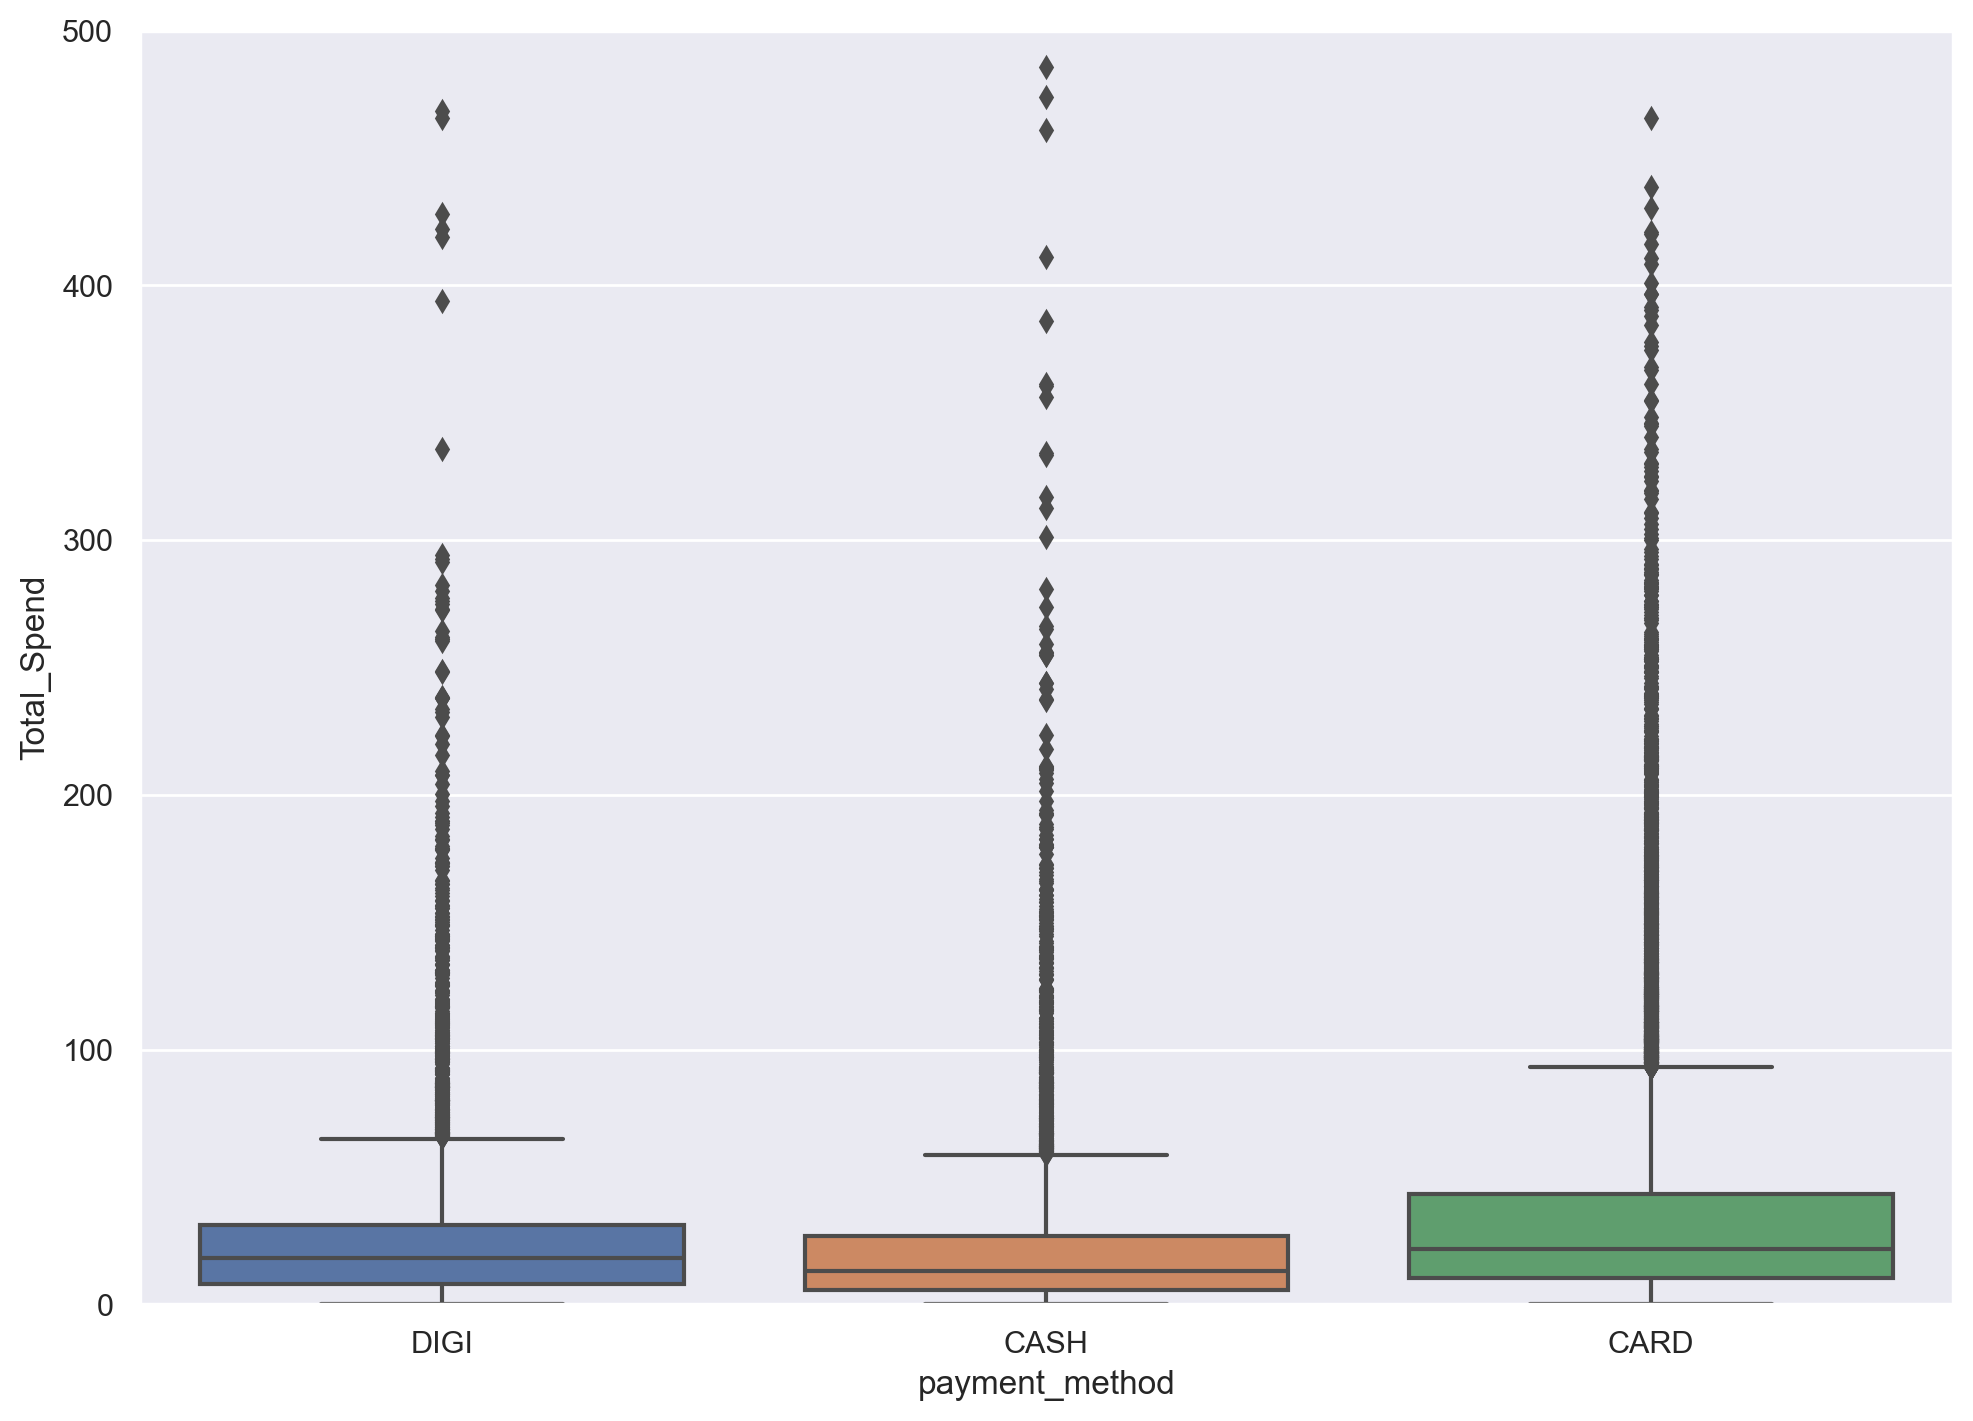

In [30]:
# seing if payment method affects total spend
sns.boxplot(x='payment_method', y='Total_Spend', data=df)
plt.ylim(0, 500)